<a href="https://colab.research.google.com/github/asanth7/Minority-USMedia-Representation/blob/main/AsianMediaRep_NLP_and_TopicModeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Web Scraping and Dataset Creation

In [ ]:
!pip install goose3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 113.4/113.4 kB 970.7 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 7.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.7/110.7 kB 11.8 MB/s eta 0:00:00
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993227 sha256=1408880421b07705d835b1df9f891f8c0aa81ae7dbd0ce0db47ce271c364de28
  Stored in directory: /root/.cache/pip/wheels/95/03/7d/59ea870c70ce4e5a370638b5462a7711ab78fba2f655d05106
Successfully built langdetect


In [ ]:
import requests
# import mediacloud.api
import pandas as pd
import numpy as np
# from newspaper import Article
from goose3 import Goose

In [ ]:
# API_KEY = "483371ec89c6aed314043066e4abc60bbad9cc7e"
# query = "Asian Americans"

# url = f'https://api.mediacloud.org/api/v2/stories_list?solr_query={query}&solr_filter=publish_date:[NOW-2YEARS TO NOW]&rows=500&key={API_KEY}'

# response = requests.get(url)
# data = response.json()

# # Process the data as needed
# for story in data['response']['docs']:
#     print(story['title'])


# NYT Developer API
# API_KEY = "kpE9CoRCAQAVY7Xq4ZpKMYVdBLxFqXxU"

def execute():
  requestUrl = f"https://api.nytimes.com/svc/search/v2/articlesearch.json?begin_date=20140610&end_date=20240609&q=Asian%20American&sort=relevance&api-key={API_KEY}"
  requestHeaders = {
    "Accept": "application/json"
  }

  response = requests.get(requestUrl, headers=requestHeaders)
  print(len(response.json()['response']['docs']))

  print(response.json()['response']['docs'])

# execute()

In [ ]:
# mc_articles = pd.read_csv("/content/mcloud_asianamerican_newsarticles.csv")
# mc_articles = mc_articles.drop(['id', 'indexed_date', 'language', 'media_url'], axis = 1)
# mc_articles.head()

mc_articles_black_24 = pd.read_csv("/content/mc_articles_black.csv")
mc_articles_black_24.drop(['id', 'indexed_date', 'language', 'media_url'], axis = 1, inplace = True)
mc_articles_black_24.head()

,media_name,publish_date,title,url
0,eurweb.com,2024-06-09,Leimert Park Jazz Festival presents Veritus Mi...,https://eurweb.com/2024/leimert-park-jazz-fest...
1,twincities.com,2024-06-09,Theater review: Ordway’s ‘Come From Away’ an u...,https://www.twincities.com/2024/06/09/theater-...
2,nypost.com,2024-06-09,Biden’s speech commemorating D-Day: Letters to...,https://nypost.com/2024/06/09/opinion/bidens-s...
3,newsday.com,2024-06-09,"From women pastors to sexual abuse to Trump, S...",https://www.newsday.com/news/nation/trump-sout...
4,mlive.com,2024-06-09,"Drawing thousands, African American cowboy cul...",https://www.mlive.com/news/2024/06/drawing-tho...


In [ ]:
mc_articles_black_24['publish_date'] = pd.to_datetime(mc_articles_black_24['publish_date']).dt.date
mc_articles_black_24 = subset_articles(end_date = date.today(), start_date=date(2024, 1, 1), name = "mc_articles_black", df=mc_articles_black_24)

In [ ]:
mc_articles_black_24

,media_name,title,url
0,eurweb.com,Leimert Park Jazz Festival presents Veritus Mi...,https://eurweb.com/2024/leimert-park-jazz-fest...
1,twincities.com,Theater review: Ordway’s ‘Come From Away’ an u...,https://www.twincities.com/2024/06/09/theater-...
2,nypost.com,Biden’s speech commemorating D-Day: Letters to...,https://nypost.com/2024/06/09/opinion/bidens-s...
3,newsday.com,"From women pastors to sexual abuse to Trump, S...",https://www.newsday.com/news/nation/trump-sout...
4,mlive.com,"Drawing thousands, African American cowboy cul...",https://www.mlive.com/news/2024/06/drawing-tho...
...,...,...,...
4496,theguardian.com,‘The fullness of life’: preserving a historic ...,https://www.theguardian.com/us-news/2024/jan/0...
4497,theguardian.com,Biden attacks Trump as grave threat to democra...,https://www.theguardian.com/us-news/2024/jan/0...
4498,theguardian.com,Mike Johnson doubles down on immigration polic...,https://www.theguardian.com/us-news/live/2024/...
4499,theguardian.com,Biden to jump-start 2024 campaign by highlight...,https://www.theguardian.com/us-news/2024/jan/0...


In [ ]:
session = requests.Session()

# Replace with the actual login URL and your credentials
login_url = 'https://myaccount.nytimes.com/auth/enter-email?response_type=cookie&client_id=lgcl&redirect_uri=https%3A%2F%2Fwww.nytimes.com'
credentials = {
    'username': 'asanthanam25@nobles.edu',
    'password': 'Aravpiano7!@'
}

# Send a POST request to the login URL with your credentials
response = session.post(login_url, data=credentials)

user_agent = 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/120.0.0.0 Safari/537.36'

# Check if login was successful
if response.ok:
    # Use the session with goose3 to extract content
    g = Goose({'browser_user_agent': user_agent, 'http_session': session})
    article = g.extract(url='https://www.nytimes.com/2024/01/18/business/dealbook/antisemitism-davos.html')

    # Print the extracted article text
    print(article.cleaned_text)
else:
    print("Login failed")

In [ ]:
from requests.exceptions import RequestException

def goose_text_extraction(article_url):
  try:
      g = Goose()
      article = g.extract(article_url)
      return article.cleaned_text
  except Exception as e:
      print(f"Error fetching text from {article_url}: {e}")
      return None

# mc_articles['text'] = mc_articles['url'].apply(goose_text_extraction)

# mc_articles = mc_articles.dropna(subset = ["text"])
# mc_articles.to_csv("mc_articles.csv", index = False)
# mc_articles.head()

mc_articles_black_24['text'] = mc_articles_black_24['url'].apply(goose_text_extraction)
mc_articles_black_24 = mc_articles_black_24.dropna(subset = ["text"])
mc_articles_black_24.to_csv("mc_articles_black_24.csv", index = False)
mc_articles_black_24.head()

Error fetching text from https://eurweb.com/2024/leimert-park-jazz-festival-presents-veritus-millers-truth-troupe-sunday-jazz-at-ora-photos/: NetworkError: status code: Forbidden; reason: 403
Error fetching text from https://www.npr.org/2024/06/09/nx-s1-4906388/the-harlem-renaissance-and-what-is-black-art-for: HTTPSConnectionPool(host='www.npr.org', port=443): Read timed out. (read timeout=30.0)


Error fetching text from https://www.npr.org/2024/06/08/g-s1-3475/social-security-ssi-asset-limits: HTTPSConnectionPool(host='www.npr.org', port=443): Read timed out. (read timeout=30.0)


Error fetching text from https://abcnews.go.com/Business/wireStory/new-account-rekindles-allegations-trump-disrespected-black-people-110918106: NetworkError: status code: Not Found; reason: 404
Error fetching text from https://www.arkansasonline.com/news/2024/jun/07/baptist-churches-led-by-women-face-vote/: NetworkError: status code: Not Found; reason: 404
Error fetching text from https://abcnews.go.com/Politics/wireStory/new-account-rekindles-allegations-trump-disrespected-black-people-110918103: NetworkError: status code: Not Found; reason: 404
Error fetching text from https://eurweb.com/2024/6-7m-sos-initiative-aids-28-groups-single-moms/: NetworkError: status code: Forbidden; reason: 403


Error fetching text from https://www.npr.org/2024/06/07/nx-s1-4984973/sam-forster-author-black-disguise-seven-shoulders: HTTPSConnectionPool(host='www.npr.org', port=443): Read timed out. (read timeout=30.0)


Error fetching text from https://www.npr.org/2024/06/06/nx-s1-4992271/tim-scott-trump-vp-black-voters: HTTPSConnectionPool(host='www.npr.org', port=443): Read timed out. (read timeout=30.0)
Error fetching text from https://www.seattletimes.com/nation-world/southern-baptists-are-poised-to-ban-churches-with-women-pastors-some-are-urging-them-to-reconsider/?utm_source=RSS&utm_medium=Referral&utm_campaign=RSS_all: HTTPSConnectionPool(host='www.seattletimes.com', port=443): Read timed out. (read timeout=30.0)


Error fetching text from https://www.seattletimes.com/nation-world/nation/tim-scott-a-potential-trump-vp-pick-launches-a-14-million-outreach-effort-to-minority-voters/?utm_source=RSS&utm_medium=Referral&utm_campaign=RSS_all: HTTPSConnectionPool(host='www.seattletimes.com', port=443): Read timed out. (read timeout=30.0)


Error fetching text from https://www.seattletimes.com/business/black-music-month-has-evolved-since-the-1970s-heres-what-you-need-to-know/?utm_source=RSS&utm_medium=Referral&utm_campaign=RSS_all: HTTPSConnectionPool(host='www.seattletimes.com', port=443): Read timed out. (read timeout=30.0)
Error fetching text from https://abcnews.go.com/Business/wireStory/black-music-month-evolved-1970s-110903520: NetworkError: status code: Not Found; reason: 404
Error fetching text from https://www.realclearpolitics.com/video/2024/06/06/trump_ive_done_more_for_black_people_than_anybody_since_abraham_lincoln_and_they_understand_it.html: NetworkError: status code: HTTP Forbidden; reason: 403
Error fetching text from https://eurweb.com/2024/coloan-brands-releases-no-bad-energy-soundtrack-for-black-music-month-featuring-jill-scott-nas-and-more/: NetworkError: status code: Forbidden; reason: 403
Error fetching text from https://www.seattletimes.com/business/a-new-account-rekindles-allegations-that-trump-di

Error fetching text from https://eurweb.com/2024/idris-elba-talks-new-docuseries-about-ww2s-heroes-of-color/: NetworkError: status code: Forbidden; reason: 403


Error fetching text from https://abcnews.go.com/Politics/wireStory/bidens-new-border-measures-change-voters-minds-110849425: NetworkError: status code: Not Found; reason: 404
Error fetching text from https://abcnews.go.com/US/wireStory/bidens-new-border-measures-change-voters-minds-110849421: NetworkError: status code: Not Found; reason: 404


Error fetching text from https://abcnews.go.com/US/wireStory/south-carolina-trading-male-supreme-court-white-110849412: NetworkError: status code: Not Found; reason: 404
Error fetching text from https://eurweb.com/2024/bob-costas-slams-racial-bias-in-wnba-coverage/: NetworkError: status code: Forbidden; reason: 403


Error fetching text from https://www.seattletimes.com/nation-world/nation/will-bidens-new-border-measures-be-enough-to-change-voters-minds/?utm_source=RSS&utm_medium=Referral&utm_campaign=RSS_all: HTTPSConnectionPool(host='www.seattletimes.com', port=443): Read timed out. (read timeout=30.0)
Error fetching text from https://www.seattletimes.com/nation-world/nation/south-carolina-is-trading-its-all-male-supreme-court-for-an-all-white-one/?utm_source=RSS&utm_medium=Referral&utm_campaign=RSS_all: HTTPSConnectionPool(host='www.seattletimes.com', port=443): Read timed out. (read timeout=30.0)


Error fetching text from https://www.thestreet.com/investing/stocks/analyst-resets-nvidia-stock-price-target-as-ceo-unveils-new-ai-platform: NetworkError: status code: Forbidden; reason: 403
Error fetching text from https://www.seattletimes.com/nation-world/nation/a-black-medic-wounded-on-d-day-saved-dozens-of-lives-hes-finally-being-posthumously-honored/?utm_source=RSS&utm_medium=Referral&utm_campaign=RSS_all: HTTPSConnectionPool(host='www.seattletimes.com', port=443): Read timed out. (read timeout=30.0)
Error fetching text from https://abcnews.go.com/US/wireStory/black-medic-wounded-day-saved-dozens-lives-finally-110788589: NetworkError: status code: Not Found; reason: 404


Error fetching text from https://www.startribune.com/a-black-medic-wounded-on-d-day-saved-dozens-of-lives-hes-finally-being-posthumously-honored/600370673/: NetworkError: status code: Not Found; reason: 404
Error fetching text from https://eurweb.com/2024/tc-carson-on-why-he-was-fired-from-living-single/: NetworkError: status code: Forbidden; reason: 403
Error fetching text from https://www.npr.org/2024/06/02/nx-s1-4971593/jon-lampley-a-veteran-of-stephen-colberts-talk-show-releases-his-debut-album: HTTPSConnectionPool(host='www.npr.org', port=443): Read timed out. (read timeout=30.0)


Error fetching text from https://eurweb.com/2024/gabby-douglas-withdraws-from-us-championships/: NetworkError: status code: Forbidden; reason: 403


Error fetching text from https://www.seattletimes.com/business/merrill-lynch-agrees-to-pay-nearly-20-million-to-settle-class-action-racial-discrimination-lawsuit/?utm_source=RSS&utm_medium=Referral&utm_campaign=RSS_all: HTTPSConnectionPool(host='www.seattletimes.com', port=443): Read timed out. (read timeout=30.0)


Error fetching text from https://abcnews.go.com/Business/wireStory/merrill-lynch-agrees-pay-20-million-settle-class-110717135: NetworkError: status code: Not Found; reason: 404
Error fetching text from https://www.startribune.com/merrill-lynch-agrees-to-pay-nearly-20-million-to-settle-class-action-racial-discrimination-lawsuit/600370055/: NetworkError: status code: Not Found; reason: 404
Error fetching text from https://www.sandiegouniontribune.com/local/story/2024-05-30/community-events-in-san-diego-county-from-philippine-cultural-festival-to-olympic-style-competition-for-first-responders: NetworkError: status code: Not Found; reason: 404
Error fetching text from https://abcnews.go.com/US/wireStory/plaza-dedicated-site-sojourner-truth-gave-1851-aint-110681628: NetworkError: status code: Not Found; reason: 404
Error fetching text from https://www.seattletimes.com/nation-world/nation/plaza-dedicated-at-the-site-where-sojourner-truth-gave-her-1851-aint-i-a-woman-speech/?utm_source=RSS&ut

Error fetching text from https://eurweb.com/2024/new-orleans-valedictorian-elijah-hogan-defies-odds-graduates-top-of-his-class-while-homeless-video/: NetworkError: status code: Forbidden; reason: 403
Error fetching text from https://www.seattletimes.com/nation-world/nation/south-carolinas-supreme-court-will-soon-have-no-black-justices/?utm_source=RSS&utm_medium=Referral&utm_campaign=RSS_all: HTTPSConnectionPool(host='www.seattletimes.com', port=443): Read timed out. (read timeout=30.0)
Error fetching text from https://abcnews.go.com/Politics/wireStory/south-carolinas-supreme-court-black-justices-110649965: NetworkError: status code: Not Found; reason: 404
Error fetching text from https://abcnews.go.com/US/wireStory/black-men-asked-leave-flight-sue-american-airlines-110649137: NetworkError: status code: Not Found; reason: 404
Error fetching text from https://www.realclearpolitics.com/video/2024/05/29/biden_campaigns_quentin_fulks_trump_kept_promises_to_black_voters_packing_the_court_wit

Error fetching text from https://www.startribune.com/black-men-who-were-asked-to-leave-a-flight-sue-american-airlines-claiming-racial-discrimination/600369455/: NetworkError: status code: Not Found; reason: 404


Error fetching text from https://abcnews.go.com/Business/wireStory/black-men-asked-leave-flight-sue-american-airlines-110649139: NetworkError: status code: Not Found; reason: 404
Error fetching text from https://www.seattletimes.com/entertainment/tv/what-to-stream-in-june-2024-the-acolyte-hit-man/?utm_source=RSS&utm_medium=Referral&utm_campaign=RSS_all: HTTPSConnectionPool(host='www.seattletimes.com', port=443): Read timed out. (read timeout=30.0)
Error fetching text from https://www.seattletimes.com/business/black-men-who-were-asked-to-leave-a-flight-sue-american-airlines-claiming-racial-discrimination/?utm_source=RSS&utm_medium=Referral&utm_campaign=RSS_all: HTTPSConnectionPool(host='www.seattletimes.com', port=443): Read timed out. (read timeout=30.0)
Error fetching text from https://www.startribune.com/south-carolinas-supreme-court-will-soon-have-no-black-justices/600369464/: NetworkError: status code: Not Found; reason: 404


Error fetching text from https://eurweb.com/2024/political-playback-california-capitol-news-you-might-have-missed-photos/: NetworkError: status code: Forbidden; reason: 403
Error fetching text from https://www.realclearpolitics.com/articles/2024/05/28/openai_and_political_bias_in_silicon_valley_151007.html: NetworkError: status code: HTTP Forbidden; reason: 403
Error fetching text from https://abcnews.go.com/Politics/wireStory/armenians-hmong-groups-feel-us-race-ethnicity-categories-110585393: NetworkError: status code: Not Found; reason: 404
Error fetching text from https://www.startribune.com/today-in-history-may-27-the-golden-gate-bridge-opens/600368916/: NetworkError: status code: Not Found; reason: 404


Error fetching text from https://www.wsj.com/articles/gil-scott-heron-winter-in-america-turns-50-brian-jackson-b4863921: NetworkError: status code: HTTP Forbidden; reason: 401
Error fetching text from https://www.seattletimes.com/nation-world/nation/armenians-hmong-and-other-groups-feel-us-race-and-ethnicity-categories-dont-represent-them/?utm_source=RSS&utm_medium=Referral&utm_campaign=RSS_all: HTTPSConnectionPool(host='www.seattletimes.com', port=443): Read timed out. (read timeout=30.0)
Error fetching text from https://abcnews.go.com/US/wireStory/armenians-hmong-groups-feel-us-race-ethnicity-categories-110585392: NetworkError: status code: Not Found; reason: 404
Error fetching text from https://www.startribune.com/armenians-hmong-and-other-groups-feel-us-race-and-ethnicity-categories-dont-represent-them/600368968/: NetworkError: status code: Not Found; reason: 404
Error fetching text from https://www.realclearpolitics.com/video/2024/05/26/scott_jennings_bidens_morehouse_speech_was_d

Error fetching text from https://eurweb.com/2024/chelsea-manalo-first-black-miss-universe-philippines/: NetworkError: status code: Forbidden; reason: 403
Error fetching text from https://www.sandiegouniontribune.com/entertainment/dining-and-drinking/story/2024-05-24/brewery-rowe-carlsbad-authors-new-book-celebrates-the-happy-pairing-of-baseball-and-beer: NetworkError: status code: Not Found; reason: 404
Error fetching text from https://eurweb.com/2024/karl-kani-the-illustrious-architect-of-authentic-urban-fashion/: NetworkError: status code: Forbidden; reason: 403
Error fetching text from https://www.seattletimes.com/seattle-news/politics/seattle-police-chief-target-of-racism-mutiny-community-leaders-say/?utm_source=RSS&utm_medium=Referral&utm_campaign=RSS_all: HTTPSConnectionPool(host='www.seattletimes.com', port=443): Read timed out. (read timeout=30.0)
Error fetching text from https://www.npr.org/2024/05/24/nx-s1-4926632/south-carolinas-only-black-supreme-court-justice-retired-raisi

Error fetching text from https://abcnews.go.com/Business/wireStory/black-americans-underrepresented-residential-care-communities-apcnhi-news-110498580: NetworkError: status code: Not Found; reason: 404
Error fetching text from https://www.startribune.com/city-strikes-deal-to-sell-its-half-of-soon-to-be-former-oakland-as-coliseum/600367989/: NetworkError: status code: Not Found; reason: 404
Error fetching text from https://www.realclearpolitics.com/video/2024/05/22/former_ga_special_prosecutor_nathan_wade_on_da_fani_willis_workplace_romances_are_as_american_as_apple_pie.html: NetworkError: status code: HTTP Forbidden; reason: 403


Error fetching text from https://www.seattletimes.com/sports/mlb/city-strikes-deal-to-sell-its-half-of-soon-to-be-former-oakland-as-coliseum/?utm_source=RSS&utm_medium=Referral&utm_campaign=RSS_all: HTTPSConnectionPool(host='www.seattletimes.com', port=443): Read timed out. (read timeout=30.0)
Error fetching text from https://www.opposingviews.com/society/photo-of-newborn-with-parents-turns-heads-after-people-spot-strange-detail: NetworkError: status code: Forbidden; reason: 403
Error fetching text from https://eurweb.com/2024/hansel-enmanuel-one-armed-b-baller-triumphed-over-adversity/: NetworkError: status code: Forbidden; reason: 403
Error fetching text from https://www.realclearpolitics.com/video/2024/05/21/michaelah_montgomery_biden_tells_blacks_that_american_doesnt_love_them_while_he_passed_bills_that_made_us_feel_unloved.html: NetworkError: status code: HTTP Forbidden; reason: 403
Error fetching text from https://www.npr.org/sections/health-shots/2024/05/21/1252701335/caregiving

Error fetching text from https://www.seattletimes.com/nation-world/nation/missouri-senators-not-taxpayers-will-pay-potential-damages-in-chiefs-rally-shooting-case/?utm_source=RSS&utm_medium=Referral&utm_campaign=RSS_all: HTTPSConnectionPool(host='www.seattletimes.com', port=443): Read timed out. (read timeout=30.0)


Error fetching text from https://www.realclearpolitics.com/video/2024/05/20/tim_scott_weaponization_of_justice_system_against_trump_is_something_we_find_repulsive_as_black_men.html: NetworkError: status code: HTTP Forbidden; reason: 403
Error fetching text from https://www.startribune.com/missouri-senators-not-taxpayers-will-pay-potential-damages-in-chiefs-rally-shooting-case/600367392/: NetworkError: status code: Not Found; reason: 404
Error fetching text from https://eurweb.com/2024/president-biden-peaceful-protests-morehouse/: NetworkError: status code: Forbidden; reason: 403
Error fetching text from https://www.npr.org/2024/05/19/1252350775/politics-chat-biden-and-trump-pin-their-hopes-on-debate-to-give-them-an-edge: HTTPSConnectionPool(host='www.npr.org', port=443): Read timed out. (read timeout=30.0)
Error fetching text from https://www.npr.org/2024/05/19/1252350775/politics-chat-biden-and-trump-pin-their-hopes-on-debate-to-give-them-an-edge?ft=nprml&f=: HTTPSConnectionPool(host=

Error fetching text from https://abcnews.go.com/Technology/wireStory/americas-black-astronaut-candidate-finally-space-60-years-110374833: NetworkError: status code: Not Found; reason: 404


Error fetching text from https://www.seattletimes.com/nation-world/nation/americas-first-black-astronaut-candidate-finally-goes-to-space-60-years-later-on-bezos-rocket/?utm_source=RSS&utm_medium=Referral&utm_campaign=RSS_all: HTTPSConnectionPool(host='www.seattletimes.com', port=443): Read timed out. (read timeout=30.0)
Error fetching text from https://www.seattletimes.com/nation-world/nation/pro-palestinian-protesters-set-up-a-new-encampment-at-drexel-university/?utm_source=RSS&utm_medium=Referral&utm_campaign=RSS_all: HTTPSConnectionPool(host='www.seattletimes.com', port=443): Read timed out. (read timeout=30.0)
Error fetching text from https://abcnews.go.com/Politics/wireStory/biden-landmark-1954-supreme-court-ruling-school-desegregation-110345355: NetworkError: status code: Not Found; reason: 404
Error fetching text from https://www.seattletimes.com/nation-world/nation/last-student-who-helped-integrate-the-university-of-north-carolinas-undergraduate-body-has-died/?utm_source=RSS&ut

Error fetching text from https://time.com/6979677/last-student-integrate-u-n-c-dies/: NetworkError: status code: Not Found; reason: 404


Error fetching text from https://www.npr.org/2024/05/17/1252012720/morning-news-brief: HTTPSConnectionPool(host='www.npr.org', port=443): Read timed out. (read timeout=30.0)
Error fetching text from https://www.seattletimes.com/business/chicago-tribune-staffers-unequal-pay-lawsuit-claims-race-and-sex-discrimination/?utm_source=RSS&utm_medium=Referral&utm_campaign=RSS_all: HTTPSConnectionPool(host='www.seattletimes.com', port=443): Read timed out. (read timeout=30.0)
Error fetching text from https://www.startribune.com/last-student-who-helped-integrate-the-university-of-north-carolinas-undergraduate-body-has-died/600366750/: NetworkError: status code: Not Found; reason: 404
Error fetching text from https://www.startribune.com/biden-says-landmark-1954-supreme-court-ruling-on-school-desegregation-was-about-more-than-education/600366776/: NetworkError: status code: Not Found; reason: 404
Error fetching text from https://www.seattletimes.com/nation-world/he-feared-coming-out-now-this-pastor

Error fetching text from https://www.seattletimes.com/nation-world/they-supported-biden-in-2020-what-made-them-change-their-minds-in-2024/?utm_source=RSS&utm_medium=Referral&utm_campaign=RSS_all: HTTPSConnectionPool(host='www.seattletimes.com', port=443): Read timed out. (read timeout=30.0)
Error fetching text from https://www.startribune.com/chicago-tribune-staffers-unequal-pay-lawsuit-claims-race-and-sex-discrimination/600366764/: NetworkError: status code: Not Found; reason: 404
Error fetching text from https://www.npr.org/2024/05/17/1251891002/biden-black-americans-education-morehouse: HTTPSConnectionPool(host='www.npr.org', port=443): Read timed out. (read timeout=30.0)
Error fetching text from https://www.seattletimes.com/nation-world/biden-says-landmark-1954-supreme-court-ruling-on-school-desegregation-was-about-more-than-education/?utm_source=RSS&utm_medium=Referral&utm_campaign=RSS_all: HTTPSConnectionPool(host='www.seattletimes.com', port=443): Read timed out. (read timeout=3

Error fetching text from https://www.startribune.com/topeka-was-at-the-center-of-brown-v-board-decades-later-segregation-of-another-sort-lingers/600366319/: NetworkError: status code: Not Found; reason: 404


Error fetching text from https://www.seattletimes.com/nation-world/nation/biden-marks-brown-v-board-of-education-anniversary-amid-signs-of-erosion-in-black-voter-support/?utm_source=RSS&utm_medium=Referral&utm_campaign=RSS_all: HTTPSConnectionPool(host='www.seattletimes.com', port=443): Read timed out. (read timeout=30.0)


Error fetching text from https://www.startribune.com/biden-marks-brown-v-board-of-education-anniversary-amid-signs-of-erosion-in-black-voter-support/600366468/: NetworkError: status code: Not Found; reason: 404
Error fetching text from https://abcnews.go.com/US/wireStory/florida-deputys-killing-black-airman-renews-debate-police-110288042: NetworkError: status code: Not Found; reason: 404
Error fetching text from https://www.realclearpolitics.com/articles/2024/05/16/voter_allegiances_changing_in_2024_150954.html: NetworkError: status code: HTTP Forbidden; reason: 403
Error fetching text from https://www.startribune.com/census-estimates-detroit-population-rises-after-decades-of-decline-south-still-dominates-us-growth/600366322/: NetworkError: status code: Not Found; reason: 404


Error fetching text from https://abcnews.go.com/US/wireStory/census-estimates-detroit-population-rises-after-decades-decline-110288040: NetworkError: status code: Not Found; reason: 404
Error fetching text from https://abcnews.go.com/US/wireStory/topeka-center-brown-board-decades-segregation-sort-lingers-110288046: NetworkError: status code: Not Found; reason: 404
Error fetching text from https://www.startribune.com/florida-deputys-killing-of-black-airman-renews-debate-on-police-killings-and-race/600366320/: NetworkError: status code: Not Found; reason: 404
Error fetching text from https://abcnews.go.com/Politics/wireStory/topeka-center-brown-board-decades-segregation-sort-lingers-110288052: NetworkError: status code: Not Found; reason: 404
Error fetching text from https://www.npr.org/2024/05/15/1250937356/supreme-court-louisiana-redistricting: HTTPSConnectionPool(host='www.npr.org', port=443): Read timed out. (read timeout=30.0)


Error fetching text from https://abcnews.go.com/US/wireStory/gets-claim-defense-shootings-airmans-death-sparks-debate-110270710: NetworkError: status code: Not Found; reason: 404
Error fetching text from https://www.seattletimes.com/nation-world/nation/census-estimates-detroit-population-rises-after-decades-of-decline-south-still-dominates-us-growth/?utm_source=RSS&utm_medium=Referral&utm_campaign=RSS_all: HTTPSConnectionPool(host='www.seattletimes.com', port=443): Read timed out. (read timeout=30.0)
Error fetching text from https://www.seattletimes.com/nation-world/nation/florida-deputys-killing-of-black-airman-renews-debate-on-police-killings-and-race/?utm_source=RSS&utm_medium=Referral&utm_campaign=RSS_all: HTTPSConnectionPool(host='www.seattletimes.com', port=443): Read timed out. (read timeout=30.0)
Error fetching text from https://www.seattletimes.com/nation-world/nation/topeka-was-at-the-center-of-brown-v-board-decades-later-segregation-of-another-sort-lingers/?utm_source=RSS&ut

Error fetching text from https://www.realclearpolitics.com/video/2024/05/13/cnns_enten_in_2020_84_of_trump_voters_were_white_in_2024_polls_say_its_closer_to_78.html: NetworkError: status code: HTTP Forbidden; reason: 403
Error fetching text from https://eurweb.com/2024/black-twitter-community-continues-to-be-a-cultural-force-and-voice-of-change-on-x/: NetworkError: status code: Forbidden; reason: 403
Error fetching text from https://abcnews.go.com/Business/wireStory/made-kind-quilts-captured-publics-imagination-target-110128750: NetworkError: status code: Not Found; reason: 404
Error fetching text from https://abcnews.go.com/US/wireStory/made-kind-quilts-captured-publics-imagination-target-110128746: NetworkError: status code: Not Found; reason: 404
Error fetching text from https://eurweb.com/2024/oprah-winfrey-unhealthy-and-unrealistic-diets/: NetworkError: status code: Forbidden; reason: 403


Error fetching text from https://www.seattletimes.com/nation-world/duchess-of-sussex-called-ifeoma-in-nigeria-speaks-with-women-about-her-nigerian-roots/?utm_source=RSS&utm_medium=Referral&utm_campaign=RSS_all: HTTPSConnectionPool(host='www.seattletimes.com', port=443): Read timed out. (read timeout=30.0)
Error fetching text from https://abcnews.go.com/International/wireStory/duchess-sussex-called-ifeoma-nigeria-speaks-women-nigerian-110135875: NetworkError: status code: Not Found; reason: 404
Error fetching text from https://www.startribune.com/duchess-of-sussex-called-ifeoma-in-nigeria-speaks-with-women-about-her-nigerian-roots/600365267/: NetworkError: status code: Not Found; reason: 404


Error fetching text from https://www.startribune.com/they-made-one-of-a-kind-quilts-that-captured-the-publics-imagination-then-target-came-along/600365207/: NetworkError: status code: Not Found; reason: 404
Error fetching text from https://www.seattletimes.com/business/they-made-one-of-a-kind-quilts-that-captured-the-publics-imagination-then-target-came-along/?utm_source=RSS&utm_medium=Referral&utm_campaign=RSS_all: HTTPSConnectionPool(host='www.seattletimes.com', port=443): Read timed out. (read timeout=30.0)
Error fetching text from https://eurweb.com/2024/california-man-charged-with-threatening-fulton-county-da-fani-willis-over-trump-prosecution/: NetworkError: status code: Forbidden; reason: 403
Error fetching text from https://www.wsj.com/arts-culture/books/late-admissions-review-glenn-lourys-rise-fall-and-rise-501cd57f: NetworkError: status code: HTTP Forbidden; reason: 401
Error fetching text from https://www.seattletimes.com/opinion/wsu-takes-a-page-from-florida-and-guts-my-com

Error fetching text from https://www.startribune.com/arkansas-cannot-prevent-2-teachers-from-discussing-critical-race-theory-in-classroom-judge-rules/600364545/: NetworkError: status code: Not Found; reason: 404
Error fetching text from https://abcnews.go.com/Politics/wireStory/advocates-supreme-court-back-louisianas-new-black-house-110029786: NetworkError: status code: Not Found; reason: 404
Error fetching text from https://www.seattletimes.com/nation-world/nation/arkansas-cannot-prevent-2-teachers-from-discussing-critical-race-theory-in-classroom-judge-rules/?utm_source=RSS&utm_medium=Referral&utm_campaign=RSS_all: HTTPSConnectionPool(host='www.seattletimes.com', port=443): Read timed out. (read timeout=30.0)
Error fetching text from https://abcnews.go.com/Politics/wireStory/arkansas-prevent-2-teachers-discussing-critical-race-theory-110033463: NetworkError: status code: Not Found; reason: 404
Error fetching text from https://www.startribune.com/future-of-mlbs-tampa-bay-rays-to-come-

Error fetching text from https://abcnews.go.com/Sports/wireStory/future-mlbs-tampa-bay-rays-focus-key-meetings-110015417: NetworkError: status code: Not Found; reason: 404
Error fetching text from https://eurweb.com/2024/why-kendrick-lamar-is-resonating-on-a-drake-rap-beef/: NetworkError: status code: Forbidden; reason: 403
Error fetching text from https://abcnews.go.com/US/wireStory/arkansas-prevent-2-teachers-discussing-critical-race-theory-110033358: NetworkError: status code: Not Found; reason: 404
Error fetching text from https://abcnews.go.com/Business/wireStory/future-mlbs-tampa-bay-rays-focus-key-meetings-110015418: NetworkError: status code: Not Found; reason: 404


Error fetching text from https://abcnews.go.com/US/wireStory/future-mlbs-tampa-bay-rays-focus-key-meetings-110015414: NetworkError: status code: Not Found; reason: 404


Error fetching text from https://www.seattletimes.com/business/future-of-mlbs-tampa-bay-rays-to-come-into-focus-with-key-meetings-on-1-3b-stadium-project/?utm_source=RSS&utm_medium=Referral&utm_campaign=RSS_all: HTTPSConnectionPool(host='www.seattletimes.com', port=443): Read timed out. (read timeout=30.0)
Error fetching text from https://www.newsday.com/news/health/cancer-study-black-women-poor-outcomes-u6uih4tp: HTTPSConnectionPool(host='www.newsday.com', port=443): Read timed out. (read timeout=30.0)
Error fetching text from https://eurweb.com/2024/juneteenth-film-festival-returns-to-kansas-city/: NetworkError: status code: Forbidden; reason: 403
Error fetching text from https://www.stltoday.com/sports/high-school/scholar-athletes/hazelwood-east-nevaeh-dudley/article_2c809e82-0c35-11ef-8c47-0feba9b1916b.html: NetworkError: status code: Too Many Requests; reason: 429
Error fetching text from https://www.seattletimes.com/nation-world/nation/judges-ask-whether-lawmakers-could-draw-up-n

Error fetching text from https://www.wsj.com/articles/free-palestine-free-pizza-protesters-students-universities-af286fb5: NetworkError: status code: HTTP Forbidden; reason: 401
Error fetching text from https://abcnews.go.com/Politics/wireStory/judges-lawmakers-draw-new-house-map-time-years-109975469: NetworkError: status code: Not Found; reason: 404
Error fetching text from https://www.startribune.com/judges-ask-whether-lawmakers-could-draw-up-new-house-map-in-time-for-this-years-elections/600364111/: NetworkError: status code: Not Found; reason: 404
Error fetching text from https://abcnews.go.com/US/wireStory/judges-lawmakers-draw-new-house-map-time-years-109975468: NetworkError: status code: Not Found; reason: 404
Error fetching text from https://eurweb.com/2024/wait-what-martell-holt-reveals-court-order-preventing-him-ex-wife-from-spanking-disciplining-their-kids-watch/: NetworkError: status code: Forbidden; reason: 403
Error fetching text from https://www.opposingviews.com/society

Error fetching text from https://abcnews.go.com/US/wireStory/advocates-supreme-court-preserve-new-black-us-house-109844661: NetworkError: status code: Not Found; reason: 404
Error fetching text from https://www.seattletimes.com/nation-world/nation/advocates-say-supreme-court-must-preserve-new-mostly-black-us-house-district-for-2024-elections/?utm_source=RSS&utm_medium=Referral&utm_campaign=RSS_all: HTTPSConnectionPool(host='www.seattletimes.com', port=443): Read timed out. (read timeout=30.0)
Error fetching text from https://www.npr.org/2024/05/01/1247010031/a-michigan-grassroots-effort-is-raising-reparations-while-the-government-lags: HTTPSConnectionPool(host='www.npr.org', port=443): Read timed out. (read timeout=30.0)
Error fetching text from https://abcnews.go.com/Politics/wireStory/advocates-supreme-court-preserve-new-black-us-house-109844662: NetworkError: status code: Not Found; reason: 404
Error fetching text from https://www.startribune.com/advocates-say-supreme-court-must-pre

Error fetching text from https://abcnews.go.com/US/wireStory/us-judges-rejected-map-louisiana-new-majority-black-109808577: NetworkError: status code: Not Found; reason: 404
Error fetching text from https://abcnews.go.com/Politics/wireStory/us-judges-rejected-map-louisiana-new-majority-black-109808578: NetworkError: status code: Not Found; reason: 404


Error fetching text from https://www.wsj.com/real-estate/henry-louis-gates-jr-finding-your-roots-pbs-fd59959d: NetworkError: status code: HTTP Forbidden; reason: 401
Error fetching text from https://www.startribune.com/us-judges-have-rejected-a-map-that-would-have-given-louisiana-a-new-majority-black-house-district/600362869/: NetworkError: status code: Not Found; reason: 404


Error fetching text from https://www.startribune.com/how-columbia-universitys-complex-history-with-the-student-protest-movement-echoes-into-today/600362331/: NetworkError: status code: Not Found; reason: 404


Error fetching text from https://abcnews.go.com/US/wireStory/columbia-universitys-complex-history-student-protest-movement-echoes-109736570: NetworkError: status code: Not Found; reason: 404
Error fetching text from https://www.seattletimes.com/nation-world/nation/how-columbia-universitys-complex-history-with-the-student-protest-movement-echoes-into-today/?utm_source=RSS&utm_medium=Referral&utm_campaign=RSS_all: HTTPSConnectionPool(host='www.seattletimes.com', port=443): Read timed out. (read timeout=30.0)
Error fetching text from https://www.startribune.com/obstacles-remain-as-women-seek-more-leadership-roles-in-americas-black-church/600362236/: NetworkError: status code: Not Found; reason: 404


Error fetching text from https://www.seattletimes.com/nation-world/obstacles-remain-as-women-seek-more-leadership-roles-in-americas-black-church/?utm_source=RSS&utm_medium=Referral&utm_campaign=RSS_all: HTTPSConnectionPool(host='www.seattletimes.com', port=443): Read timed out. (read timeout=30.0)
Error fetching text from https://abcnews.go.com/Politics/wireStory/biden-administration-indefinitely-postpones-rule-banned-menthol-flavored-109701610: NetworkError: status code: Not Found; reason: 404
Error fetching text from https://abcnews.go.com/Business/wireStory/biden-officials-indefinitely-postpone-ban-menthol-cigarettes-amid-109705618: NetworkError: status code: Not Found; reason: 404
Error fetching text from https://www.startribune.com/biden-administration-indefinitely-postpones-rule-that-would-have-banned-menthol-flavored-cigarettes/600361946/: NetworkError: status code: Not Found; reason: 404


Error fetching text from https://www.startribune.com/biden-officials-indefinitely-postpone-ban-on-menthol-cigarettes-amid-election-year-pushback/600361946/: NetworkError: status code: Not Found; reason: 404


Error fetching text from https://abcnews.go.com/US/wireStory/biden-administration-indefinitely-postpones-rule-banned-menthol-flavored-109701608: NetworkError: status code: Not Found; reason: 404
Error fetching text from https://www.seattletimes.com/seattle-news/health/biden-administration-indefinitely-postpones-rule-that-would-have-banned-menthol-flavored-cigarettes/?utm_source=RSS&utm_medium=Referral&utm_campaign=RSS_all: HTTPSConnectionPool(host='www.seattletimes.com', port=443): Read timed out. (read timeout=30.0)
Error fetching text from https://abcnews.go.com/US/wireStory/us-labor-secretary-uaw-win-tennessee-volkswagen-plant-109627894: NetworkError: status code: Not Found; reason: 404
Error fetching text from https://www.seattletimes.com/business/u-s-labor-secretary-says-uaw-win-at-tennessee-volkswagen-plant-shows-southern-workers-back-unions/?utm_source=RSS&utm_medium=Referral&utm_campaign=RSS_all: HTTPSConnectionPool(host='www.seattletimes.com', port=443): Read timed out. (read 

Error fetching text from https://www.startribune.com/us-labor-secretary-says-uaw-win-at-tennessee-volkswagen-plant-shows-southern-workers-back-unions/600361593/: NetworkError: status code: Not Found; reason: 404
Error fetching text from https://www.postandcourier.com/free-times/arts/what-happened-ruthy-ramizrez-claire-jimenez-pen-faulkner/article_7e9b948a-f9c8-11ee-a2f5-337875fa7119.html: NetworkError: status code: Too Many Requests; reason: 429
Error fetching text from https://www.realclearpolitics.com/video/2024/04/24/andrew_walworth_i_dont_think_the_biden_campaign_thinks_they_can_win_florida.html: NetworkError: status code: HTTP Forbidden; reason: 403
Error fetching text from https://www.npr.org/2024/04/23/1246682932/a-grassroots-effort-in-michigan-is-raising-reparations-while-the-government-lags?ft=nprml&f=: HTTPSConnectionPool(host='www.npr.org', port=443): Read timed out. (read timeout=30.0)
Error fetching text from https://www.npr.org/2024/04/23/1246546168/through-genetics-resea

Error fetching text from https://www.seattletimes.com/nation-world/nation/william-strickland-a-longtime-civil-rights-activist-scholar-and-friend-of-malcom-x-has-died/?utm_source=RSS&utm_medium=Referral&utm_campaign=RSS_all: HTTPSConnectionPool(host='www.seattletimes.com', port=443): Read timed out. (read timeout=30.0)
Error fetching text from https://www.startribune.com/william-strickland-a-longtime-civil-rights-activist-scholar-and-friend-of-malcom-x-has-died/600360819/: NetworkError: status code: Not Found; reason: 404


Error fetching text from https://www.npr.org/2024/04/21/1246239202/life-kit-swimming-skills?ft=nprml&f=: HTTPSConnectionPool(host='www.npr.org', port=443): Read timed out. (read timeout=30.0)
Error fetching text from https://www.npr.org/2024/04/21/1246236307/a-century-long-effort-to-recast-the-civil-war: HTTPSConnectionPool(host='www.npr.org', port=443): Read timed out. (read timeout=30.0)
Error fetching text from https://www.npr.org/2024/04/21/1246239202/life-kit-swimming-skills: HTTPSConnectionPool(host='www.npr.org', port=443): Read timed out. (read timeout=30.0)
Error fetching text from https://www.npr.org/2024/04/21/1244899635/civil-war-confederate-statue-markers-sign-history: HTTPSConnectionPool(host='www.npr.org', port=443): Read timed out. (read timeout=30.0)
Error fetching text from https://www.npr.org/2024/04/21/1246236307/a-century-long-effort-to-recast-the-civil-war?ft=nprml&f=: HTTPSConnectionPool(host='www.npr.org', port=443): Read timed out. (read timeout=30.0)
Error fet

Error fetching text from https://www.startribune.com/anti-trump-republican-larry-hogan-navigates-dangerous-political-terrain-in-pivotal-senate-contest/600359433/: NetworkError: status code: Not Found; reason: 404


Error fetching text from https://www.seattletimes.com/nation-world/nation/new-black-congressional-district-in-louisiana-bows-to-politics-not-race-backers-say/?utm_source=RSS&utm_medium=Referral&utm_campaign=RSS_all: HTTPSConnectionPool(host='www.seattletimes.com', port=443): Read timed out. (read timeout=30.0)
Error fetching text from https://www.npr.org/2024/04/16/1244991266/why-more-than-14-000-black-kidney-transplant-patients-are-moving-up-on-the-waitl: HTTPSConnectionPool(host='www.npr.org', port=443): Read timed out. (read timeout=30.0)
Error fetching text from https://www.npr.org/2024/04/16/1244991266/why-more-than-14-000-black-kidney-transplant-patients-are-moving-up-on-the-waitl?ft=nprml&f=: HTTPSConnectionPool(host='www.npr.org', port=443): Read timed out. (read timeout=30.0)
Error fetching text from https://www.seattletimes.com/nation-world/nation/anti-trump-republican-larry-hogan-navigates-dangerous-political-terrain-in-pivotal-senate-contest/?utm_source=RSS&utm_medium=Refer

Error fetching text from https://www.startribune.com/beyonce-is-bringing-her-fans-of-color-to-country-music-will-they-be-welcomed-in/600358971/: NetworkError: status code: Not Found; reason: 404
Error fetching text from https://www.seattletimes.com/seattle-news/traces-of-seattles-black-panthers-are-all-around-if-you-know-where-to-look/?utm_source=RSS&utm_medium=Referral&utm_campaign=RSS_all: HTTPSConnectionPool(host='www.seattletimes.com', port=443): Read timed out. (read timeout=30.0)
Error fetching text from https://abcnews.go.com/US/wireStory/texas-diversity-equity-inclusion-ban-led-100-job-109189333: NetworkError: status code: Not Found; reason: 404
Error fetching text from https://www.npr.org/2024/04/13/685930840/faith-ringgold-quilt-and-visual-artist-dies-at-93: HTTPSConnectionPool(host='www.npr.org', port=443): Read timed out. (read timeout=30.0)
Error fetching text from https://www.startribune.com/faith-ringgold-pioneering-black-quilt-artist-and-author-dies-at-93/600358684/: Ne

Error fetching text from https://www.startribune.com/texas-diversity-equity-and-inclusion-ban-has-led-to-more-than-100-job-cuts-at-state-universities/600358550/: NetworkError: status code: Not Found; reason: 404
Error fetching text from https://www.npr.org/2024/04/12/1244265698/the-cultural-legacy-of-oj-simpson-football-player-actor-and-murder-suspect?ft=nprml&f=: HTTPSConnectionPool(host='www.npr.org', port=443): Read timed out. (read timeout=30.0)
Error fetching text from https://www.npr.org/2024/04/12/1244509031/hilltop-howard-universitys-student-newspaper-is-going-strong-at-100-years-old?ft=nprml&f=: HTTPSConnectionPool(host='www.npr.org', port=443): Read timed out. (read timeout=30.0)


Error fetching text from https://www.seattletimes.com/nation-world/nation/texas-diversity-equity-and-inclusion-ban-has-led-to-more-than-100-job-cuts-at-state-universities/?utm_source=RSS&utm_medium=Referral&utm_campaign=RSS_all: HTTPSConnectionPool(host='www.seattletimes.com', port=443): Read timed out. (read timeout=30.0)


Error fetching text from https://www.seattletimes.com/nation-world/nation/a-trump-campaign-stop-at-an-atlanta-chick-fil-a-offers-a-window-into-his-outreach-to-black-voters/?utm_source=RSS&utm_medium=Referral&utm_campaign=RSS_all: HTTPSConnectionPool(host='www.seattletimes.com', port=443): Read timed out. (read timeout=30.0)
Error fetching text from https://www.npr.org/2024/04/12/1244509031/hilltop-howard-universitys-student-newspaper-is-going-strong-at-100-years-old: HTTPSConnectionPool(host='www.npr.org', port=443): Read timed out. (read timeout=30.0)
Error fetching text from https://abcnews.go.com/Politics/wireStory/trump-campaign-stop-atlanta-chick-fil-offers-window-109177128: NetworkError: status code: Not Found; reason: 404
Error fetching text from https://www.npr.org/sections/health-shots/2024/04/12/1244132197/lung-cancer-immunotherapy-survival-targeted-therapy: HTTPSConnectionPool(host='www.npr.org', port=443): Read timed out. (read timeout=30.0)
Error fetching text from https:/

Error fetching text from https://www.npr.org/2024/04/12/1244265698/the-cultural-legacy-of-oj-simpson-football-player-actor-and-murder-suspect: HTTPSConnectionPool(host='www.npr.org', port=443): Read timed out. (read timeout=30.0)
Error fetching text from https://abcnews.go.com/US/wireStory/trump-campaign-stop-atlanta-chick-fil-offers-window-109177127: NetworkError: status code: Not Found; reason: 404
Error fetching text from https://www.npr.org/2024/04/11/1244097564/oj-simpson-football-nicole-brown-ronald-goldman-white-bronco: HTTPSConnectionPool(host='www.npr.org', port=443): Read timed out. (read timeout=30.0)
Error fetching text from https://www.realclearpolitics.com/video/2024/04/10/jesse_watters_trump_should_run_a_chick-fil-a_campaign_have_people_embrace_him_in_malls_and_restaurants.html: NetworkError: status code: HTTP Forbidden; reason: 403


Error fetching text from https://www.thestreet.com/investing/stocks/analysts-revamps-nvidia-price-target-amid-slump-as-mag-7-earnings-loom: NetworkError: status code: Forbidden; reason: 403
Error fetching text from https://abcnews.go.com/Sports/wireStory/hank-aaron-rose-racist-hate-mail-threats-pursuit-108962658: NetworkError: status code: Not Found; reason: 404
Error fetching text from https://www.seattletimes.com/sports/mlb/hank-aaron-rose-above-racist-hate-mail-and-threats-in-pursuit-of-ruths-home-run-record-50-years-ago/?utm_source=RSSutm_medium=Referralutm_campaign=RSS_all: HTTPSConnectionPool(host='www.seattletimes.com', port=443): Read timed out. (read timeout=30.0)


Error fetching text from https://www.startribune.com/hank-aaron-rose-above-racist-hate-mail-and-threats-in-pursuit-of-ruths-home-run-record-50-years-ago/600357016/: NetworkError: status code: Not Found; reason: 404
Error fetching text from https://www.stltoday.com/sports/professional/mlb/hank-aaron-babe-ruth-atlanta-braves-hr-715/article_0261ce89-d192-54bd-ac08-55dad833af0d.html: NetworkError: status code: Too Many Requests; reason: 429
Error fetching text from https://www.seattletimes.com/nation-world/nation-politics/biden-waves-his-first-term-resume-at-a-skeptical-america/?utm_source=RSS&utm_medium=Referral&utm_campaign=RSS_all: HTTPSConnectionPool(host='www.seattletimes.com', port=443): Read timed out. (read timeout=30.0)
Error fetching text from https://www.npr.org/sections/goatsandsoda/2024/04/05/1242304226/beyonce-texas-hold-em-banjo-carter-country: HTTPSConnectionPool(host='www.npr.org', port=443): Read timed out. (read timeout=30.0)
Error fetching text from https://www.wsj.com/

Error fetching text from https://www.seattletimes.com/nation-world/nation/man-cuffed-but-not-charged-after-chiefs-super-bowl-rally-shooting-sues-3-more-lawmakers-over-posts/?utm_source=RSS&utm_medium=Referral&utm_campaign=RSS_all: HTTPSConnectionPool(host='www.seattletimes.com', port=443): Read timed out. (read timeout=30.0)
Error fetching text from https://abcnews.go.com/US/wireStory/man-cuffed-charged-after-chiefs-super-bowl-rally-108818486: NetworkError: status code: Not Found; reason: 404
Error fetching text from https://www.startribune.com/man-cuffed-but-not-charged-after-chiefs-super-bowl-rally-shooting-sues-3-more-lawmakers-over-posts/600356152/: NetworkError: status code: Not Found; reason: 404


Error fetching text from https://www.startribune.com/southern-jaguars-are-pride-of-hbcu-baseball-after-its-upset-of-defending-national-champion-lsu/600356044/: NetworkError: status code: Not Found; reason: 404
Error fetching text from https://eurweb.com/2024/beyonce-receives-the-iheartradio-innovator-award/: NetworkError: status code: Forbidden; reason: 403
Error fetching text from https://www.seattletimes.com/sports/southern-jaguars-are-pride-of-hbcu-baseball-after-its-upset-of-defending-national-champion-lsu/?utm_source=RSS&utm_medium=Referral&utm_campaign=RSS_all: HTTPSConnectionPool(host='www.seattletimes.com', port=443): Read timed out. (read timeout=30.0)
Error fetching text from https://www.startribune.com/going-from-assistant-to-head-job-remains-a-tough-climb-for-black-coaches-in-top-mens-conferences/600355769/: NetworkError: status code: Not Found; reason: 404


Error fetching text from https://abcnews.go.com/Health/wireStory/lawsuit-seeks-force-ban-menthol-cigarettes-after-months-108754320: NetworkError: status code: Not Found; reason: 404
Error fetching text from https://www.seattletimes.com/business/lawsuit-seeks-to-force-ban-on-menthol-cigarettes-after-months-of-delays-by-biden-administration/?utm_source=RSS&utm_medium=Referral&utm_campaign=RSS_all: HTTPSConnectionPool(host='www.seattletimes.com', port=443): Read timed out. (read timeout=30.0)


Error fetching text from https://www.seattletimes.com/sports/going-from-assistant-to-head-job-remains-a-tough-climb-for-black-coaches-in-top-mens-conferences/?utm_source=RSS&utm_medium=Referral&utm_campaign=RSS_all: HTTPSConnectionPool(host='www.seattletimes.com', port=443): Read timed out. (read timeout=30.0)
Error fetching text from https://abcnews.go.com/US/wireStory/lawsuit-seeks-force-ban-menthol-cigarettes-after-months-108754318: NetworkError: status code: Not Found; reason: 404
Error fetching text from https://www.startribune.com/lawsuit-seeks-to-force-ban-on-menthol-cigarettes-after-months-of-delays-by-biden-administration/600355770/: NetworkError: status code: Not Found; reason: 404


Error fetching text from https://www.npr.org/2024/04/01/1241959433/how-easter-monday-at-smithsonian-national-zoo-became-a-tradition-for-black-famil?ft=nprml&f=: HTTPSConnectionPool(host='www.npr.org', port=443): Read timed out. (read timeout=30.0)
Error fetching text from https://www.npr.org/2024/04/01/1241959433/how-easter-monday-at-smithsonian-national-zoo-became-a-tradition-for-black-famil: HTTPSConnectionPool(host='www.npr.org', port=443): Read timed out. (read timeout=30.0)
Error fetching text from https://eurweb.com/2024/esther-dillard-receives-2024-prestigious-gracie-award/: NetworkError: status code: Forbidden; reason: 403


Error fetching text from https://eurweb.com/2024/black-mayors-coalition-on-crime/: NetworkError: status code: Forbidden; reason: 403
Error fetching text from https://www.npr.org/2024/03/30/1241744895/wes-moore-baltimore-bridge-collapse: HTTPSConnectionPool(host='www.npr.org', port=443): Read timed out. (read timeout=30.0)
Error fetching text from https://www.seattletimes.com/pacific-nw-magazine/march-31-your-turn/?utm_source=RSS&utm_medium=Referral&utm_campaign=RSS_all: HTTPSConnectionPool(host='www.seattletimes.com', port=443): Read timed out. (read timeout=30.0)
Error fetching text from https://www.npr.org/2024/03/29/1241726838/who-is-maryland-governor-wes-moore?ft=nprmlf=: HTTPSConnectionPool(host='www.npr.org', port=443): Read timed out. (read timeout=30.0)
Error fetching text from https://www.seattletimes.com/education-lab/seattle-schools-will-hold-meetings-examine-practices-at-rainier-view/?utm_source=RSS&utm_medium=Referral&utm_campaign=RSS_all: HTTPSConnectionPool(host='www.sea

Error fetching text from https://www.npr.org/2024/03/29/1241592102/rhiannon-giddens-and-the-carolina-chocolate-drops-put-a-modern-twist-on-traditio: HTTPSConnectionPool(host='www.npr.org', port=443): Read timed out. (read timeout=30.0)
Error fetching text from https://www.npr.org/2024/03/29/1198911130/consider-this-from-npr-draft-03-29-2024: HTTPSConnectionPool(host='www.npr.org', port=443): Read timed out. (read timeout=30.0)
Error fetching text from https://www.npr.org/2024/03/29/1241726838/who-is-maryland-governor-wes-moore: HTTPSConnectionPool(host='www.npr.org', port=443): Read timed out. (read timeout=30.0)
Error fetching text from https://www.seattletimes.com/nation-world/sailors-remains-identified-82-years-after-pearl-harbor/?utm_source=RSS&utm_medium=Referral&utm_campaign=RSS_all: HTTPSConnectionPool(host='www.seattletimes.com', port=443): Read timed out. (read timeout=30.0)


Error fetching text from https://eurweb.com/2024/louis-gossett-jr-oscar-winning-star-of-an-officer-and-a-gentleman-dead-at-87-video/: NetworkError: status code: Forbidden; reason: 403
Error fetching text from https://www.realclearpolitics.com/video/2024/03/28/gutfeld_democrats_are_focused_on_useless_woke_virtue_signaling_while_country_is_falling_apart.html: NetworkError: status code: HTTP Forbidden; reason: 403
Error fetching text from https://abcnews.go.com/Business/wireStory/us-categorizes-people-race-ethnicity-revision-27-years-108605655: NetworkError: status code: Not Found; reason: 404
Error fetching text from https://www.postandcourier.com/aikenstandard/education/edgefield-county-johnston-elementary-black-history/article_d6e57a16-e87f-11ee-a4cb-8389fd5b8964.html: NetworkError: status code: Too Many Requests; reason: 429
Error fetching text from https://www.npr.org/2024/03/28/1241357536/beyonces-foray-into-country-music-with-cowboy-carter-has-been-polarizing?ft=nprml&f=: HTTPSConn

Error fetching text from https://www.startribune.com/us-changes-how-it-categorizes-people-by-race-and-ethnicity-its-the-first-revision-in-27-years/600354648/: NetworkError: status code: Not Found; reason: 404
Error fetching text from https://www.seattletimes.com/business/us-changes-how-it-categorizes-people-by-race-and-ethnicity-its-the-first-revision-in-27-years/?utm_source=RSS&utm_medium=Referral&utm_campaign=RSS_all: HTTPSConnectionPool(host='www.seattletimes.com', port=443): Read timed out. (read timeout=30.0)
Error fetching text from https://eurweb.com/2024/paul-youngs-black-mayors-coalition-on-crime/: NetworkError: status code: Forbidden; reason: 403
Error fetching text from https://www.npr.org/2024/03/28/1239289512/black-jewish-grand-alliance-civil-rights-history: HTTPSConnectionPool(host='www.npr.org', port=443): Read timed out. (read timeout=30.0)
Error fetching text from https://www.npr.org/2024/03/28/1241357536/beyonces-foray-into-country-music-with-cowboy-carter-has-been-po

Error fetching text from https://www.npr.org/2024/03/28/1237218459/census-race-categories-ethnicity-middle-east-north-africa: HTTPSConnectionPool(host='www.npr.org', port=443): Read timed out. (read timeout=30.0)
Error fetching text from https://www.npr.org/2024/03/27/1240892448/why-oregons-groundbreaking-drug-decriminalization-experiment-is-coming-to-an-end?ft=nprml&f=: HTTPSConnectionPool(host='www.npr.org', port=443): Read timed out. (read timeout=30.0)
Error fetching text from https://www.npr.org/2024/03/27/1240892448/why-oregons-groundbreaking-drug-decriminalization-experiment-is-coming-to-an-end: HTTPSConnectionPool(host='www.npr.org', port=443): Read timed out. (read timeout=30.0)
Error fetching text from https://eurweb.com/2024/good-times-the-animated-series-is-coming-to-netflix/: NetworkError: status code: Forbidden; reason: 403
Error fetching text from https://www.wsj.com/articles/why-im-saying-no-to-nihs-racial-preferences-medical-research-7f205c2c: NetworkError: status code

Error fetching text from https://www.seattletimes.com/nation-world/nation/robert-f-kennedy-jr-is-expected-to-announce-his-vp-pick-for-his-third-party-white-house-bid/?utm_source=RSS&utm_medium=Referral&utm_campaign=RSS_all: HTTPSConnectionPool(host='www.seattletimes.com', port=443): Read timed out. (read timeout=30.0)


Error fetching text from https://abcnews.go.com/Politics/wireStory/trump-tells-michigans-republican-chair-ramp-outreach-black-108481852: NetworkError: status code: Not Found; reason: 404
Error fetching text from https://www.seattletimes.com/nation-world/nation/high-school-teacher-and-students-sue-over-arkansas-ban-on-critical-race-theory/?utm_source=RSS&utm_medium=Referral&utm_campaign=RSS_all: HTTPSConnectionPool(host='www.seattletimes.com', port=443): Read timed out. (read timeout=30.0)
Error fetching text from https://www.startribune.com/trump-tells-michigans-republican-chair-to-ramp-up-outreach-to-black-voters-in-detroit-chair-says/600353966/: NetworkError: status code: Not Found; reason: 404


Error fetching text from https://www.startribune.com/high-school-teacher-and-students-sue-over-arkansas-ban-on-critical-race-theory/600353997/: NetworkError: status code: Not Found; reason: 404
Error fetching text from https://abcnews.go.com/US/wireStory/high-school-teacher-students-sue-arkansas-ban-critical-108483806: NetworkError: status code: Not Found; reason: 404


Error fetching text from https://www.seattletimes.com/business/trump-tells-michigans-republican-chair-to-ramp-up-outreach-to-black-voters-in-detroit-chair-says/?utm_source=RSSutm_medium=Referralutm_campaign=RSS_all: HTTPSConnectionPool(host='www.seattletimes.com', port=443): Read timed out. (read timeout=30.0)
Error fetching text from https://eurweb.com/2024/mike-maydens-league-30-day-marathon-games/: NetworkError: status code: Forbidden; reason: 403


Error fetching text from https://www.seattletimes.com/entertainment/visual-arts/new-mopop-massive-exhibit-asks-what-is-pop-culture/?utm_source=RSSutm_medium=Referralutm_campaign=RSS_all: HTTPSConnectionPool(host='www.seattletimes.com', port=443): Read timed out. (read timeout=30.0)


Error fetching text from https://eurweb.com/2024/wendy-williams-son-forced-to-adapt-to-subdued-lifestyle/: NetworkError: status code: Forbidden; reason: 403
Error fetching text from https://www.npr.org/sections/health-shots/2024/03/21/1239780337/with-a-federal-menthol-ban-looming-tobacco-companies-push-non-menthol-substitute: HTTPSConnectionPool(host='www.npr.org', port=443): Read timed out. (read timeout=30.0)
Error fetching text from https://www.startribune.com/southern-baptists-pick-a-california-seminary-president-to-lead-its-troubled-administrative-body/600353121/: NetworkError: status code: Not Found; reason: 404
Error fetching text from https://www.postandcourier.com/berkeley-independent/moncks-corner-celebrates-st-patricks-day/article_87545a0c-e7ea-11ee-8874-3bbfae097f70.html: NetworkError: status code: Too Many Requests; reason: 429
Error fetching text from https://www.seattletimes.com/opinion/trumps-lost-cause-mythmaking/?utm_source=RSS&utm_medium=Referral&utm_campaign=RSS_all

Error fetching text from https://www.npr.org/2024/03/20/1238810380/comedy-tiktok-cubicle-comedian-black-creator-corporate-america: HTTPSConnectionPool(host='www.npr.org', port=443): Read timed out. (read timeout=30.0)
Error fetching text from https://www.seattletimes.com/nation-world/nation/biden-skipped-visiting-a-black-church-on-his-recent-michigan-trip-angering-some-community-leaders/?utm_source=RSS&utm_medium=Referral&utm_campaign=RSS_all: HTTPSConnectionPool(host='www.seattletimes.com', port=443): Read timed out. (read timeout=30.0)
Error fetching text from https://www.opposingviews.com/society/old-man-scans-garage-sales-all-over-town-spots-object-under-table-and-cant-believe-his-eyes: NetworkError: status code: Forbidden; reason: 403


Error fetching text from https://www.startribune.com/biden-skipped-visiting-a-black-church-on-his-recent-michigan-trip-angering-some-community-leaders/600352664/: NetworkError: status code: Not Found; reason: 404


Error fetching text from https://www.startribune.com/buddhists-use-karmic-healing-against-one-us-citys-anti-asian-legacy-and-nationwide-prejudice-today/600352291/: NetworkError: status code: Not Found; reason: 404
Error fetching text from https://eurweb.com/2024/wendy-williams-son-earned-substantial-profits-from-docuseries/: NetworkError: status code: Forbidden; reason: 403
Error fetching text from https://abcnews.go.com/US/wireStory/antioch-city-complex-anti-asian-history-takes-meaningful-108269092: NetworkError: status code: Not Found; reason: 404
Error fetching text from https://www.startribune.com/antioch-a-city-with-a-complex-anti-asian-history-takes-meaningful-steps-toward-reconciliation/600352290/: NetworkError: status code: Not Found; reason: 404


Error fetching text from https://eurweb.com/2024/2-black-men-speak-about-being-tortured-by-white-officers/: NetworkError: status code: Forbidden; reason: 403
Error fetching text from https://abcnews.go.com/US/wireStory/buddhists-karmic-healing-us-citys-anti-asian-legacy-108269620: NetworkError: status code: Not Found; reason: 404


Error fetching text from https://www.seattletimes.com/entertainment/books/in-still-true-a-local-author-is-rewriting-the-rules-of-journalism/?utm_source=RSSutm_medium=Referralutm_campaign=RSS_all: HTTPSConnectionPool(host='www.seattletimes.com', port=443): Read timed out. (read timeout=30.0)
Error fetching text from https://www.npr.org/2024/03/17/1239005042/photographer-david-johnson-san-francisco-black-culture-dead: HTTPSConnectionPool(host='www.npr.org', port=443): Read timed out. (read timeout=30.0)
Error fetching text from https://www.npr.org/2024/03/15/1238741325/servicemembers-current-and-retired-renew-push-to-rename-the-uss-john-c-stennis?ft=nprml&f=: HTTPSConnectionPool(host='www.npr.org', port=443): Read timed out. (read timeout=30.0)
Error fetching text from https://www.npr.org/2024/03/15/1238765442/rnc-trump-republicans-whatley-lara-election-integrity-voter-fraud-early-voting: HTTPSConnectionPool(host='www.npr.org', port=443): Read timed out. (read timeout=30.0)
Error fetchin

Error fetching text from https://www.npr.org/2024/03/14/1238102768/fetal-personhood-alabama-ivf: HTTPSConnectionPool(host='www.npr.org', port=443): Read timed out. (read timeout=30.0)
Error fetching text from https://eurweb.com/2024/hbcu-grad-receives-presidential-lifetime-achievement-award/: NetworkError: status code: Forbidden; reason: 403


Error fetching text from https://abcnews.go.com/US/wireStory/threats-black-cemeteries-persist-movement-preserve-sacred-heritage-108112118: NetworkError: status code: Not Found; reason: 404
Error fetching text from https://www.startribune.com/biden-heads-to-the-michigan-county-emerging-as-the-swing-states-top-bellwether/600350939/: NetworkError: status code: Not Found; reason: 404


Error fetching text from https://www.marketwatch.com/story/this-investor-made-billions-on-weight-watchers-over-23-years-and-got-out-just-before-the-stock-imploded-a1b0ae52?mod=mw_rss_topstories: NetworkError: status code: HTTP Forbidden; reason: 401
Error fetching text from https://www.npr.org/2024/03/13/1238225241/students-and-teachers-in-florida-can-say-gay-again-without-fear-of-punishment: HTTPSConnectionPool(host='www.npr.org', port=443): Read timed out. (read timeout=30.0)
Error fetching text from https://www.seattletimes.com/nation-world/nation/dorie-ann-ladner-civil-rights-activist-who-fought-for-justice-in-mississippi-and-beyond-dies-at-81/?utm_source=RSS&utm_medium=Referral&utm_campaign=RSS_all: HTTPSConnectionPool(host='www.seattletimes.com', port=443): Read timed out. (read timeout=30.0)
Error fetching text from https://abcnews.go.com/US/wireStory/dorie-ann-ladner-civil-rights-activist-fought-justice-108094731: NetworkError: status code: Not Found; reason: 404
Error fetching

Error fetching text from https://www.startribune.com/dorie-ann-ladner-civil-rights-activist-who-fought-for-justice-in-mississippi-and-beyond-dies-at-81/600350832/: NetworkError: status code: Not Found; reason: 404
Error fetching text from https://eurweb.com/2024/ten-little-known-facts-about-harriet-tubman/: NetworkError: status code: Forbidden; reason: 403
Error fetching text from https://www.npr.org/2024/03/13/1238225241/students-and-teachers-in-florida-can-say-gay-again-without-fear-of-punishment?ft=nprml&f=: HTTPSConnectionPool(host='www.npr.org', port=443): Read timed out. (read timeout=30.0)
Error fetching text from https://www.seattletimes.com/nation-world/nation/regents-pick-new-hampshire-provost-to-replace-uw-la-crosse-chancellor-fired-over-porn-career/?utm_source=RSS&utm_medium=Referral&utm_campaign=RSS_all: HTTPSConnectionPool(host='www.seattletimes.com', port=443): Read timed out. (read timeout=30.0)
Error fetching text from https://www.startribune.com/regents-pick-new-hamps

Error fetching text from https://www.seattletimes.com/business/biden-heads-to-the-michigan-county-emerging-as-the-swing-states-top-bellwether/?utm_source=RSS&utm_medium=Referral&utm_campaign=RSS_all: HTTPSConnectionPool(host='www.seattletimes.com', port=443): Read timed out. (read timeout=30.0)
Error fetching text from https://www.npr.org/2024/03/13/1238250339/the-first-black-pilot-of-a-commercial-airline-has-died-at-89: HTTPSConnectionPool(host='www.npr.org', port=443): Read timed out. (read timeout=30.0)
Error fetching text from https://www.npr.org/2024/03/12/1238049339/rnc-layoffs-staff-cuts-republican-party-trump-whatley-lara: HTTPSConnectionPool(host='www.npr.org', port=443): Read timed out. (read timeout=30.0)
Error fetching text from https://www.realclearpolitics.com/video/2024/03/11/bet_talks_to_black_voters_im_voting_trump_post-obama_the_party_just_wasnt_suitable_to_the_goals_that_i_have.html: NetworkError: status code: HTTP Forbidden; reason: 403
Error fetching text from http

Error fetching text from https://abcnews.go.com/Sports/wireStory/mlb-sees-slowly-improving-diversity-youth-pipeline-despite-108000970: NetworkError: status code: Not Found; reason: 404
Error fetching text from https://www.seattletimes.com/sports/mlb/mlb-sees-slowly-improving-diversity-in-its-youth-pipeline-despite-record-low-black-major-leaguers/?utm_source=RSS&utm_medium=Referral&utm_campaign=RSS_all: HTTPSConnectionPool(host='www.seattletimes.com', port=443): Read timed out. (read timeout=30.0)
Error fetching text from https://www.opposingviews.com/society/man-gets-kicked-out-of-restaurant-because-his-t-shirt-offended-customers: NetworkError: status code: Forbidden; reason: 403
Error fetching text from https://www.startribune.com/mlb-sees-slowly-improving-diversity-in-its-youth-pipeline-despite-record-low-black-major-leaguers/600350043/: NetworkError: status code: Not Found; reason: 404
Error fetching text from https://www.startribune.com/book-review-a-coming-of-age-story-of-a-young-

Error fetching text from https://www.npr.org/2024/03/10/1237298879/the-rise-of-cubicle-comedians: HTTPSConnectionPool(host='www.npr.org', port=443): Read timed out. (read timeout=30.0)
Error fetching text from https://www.opposingviews.com/society/womans-facebook-post-about-hobby-lobby-cotton-decoration-stirs-controversy: NetworkError: status code: Forbidden; reason: 403
Error fetching text from https://www.npr.org/2024/03/10/1236796237/a-biden-victory-in-michigan-could-depend-on-black-voters: HTTPSConnectionPool(host='www.npr.org', port=443): Read timed out. (read timeout=30.0)
Error fetching text from https://www.realclearpolitics.com/video/2024/03/10/joe_rogan_elon_musk_buying_twitter_really_made_a_turn_in_our_culture_for_free_speech.html: NetworkError: status code: HTTP Forbidden; reason: 403
Error fetching text from https://www.npr.org/2024/03/10/1237298879/the-rise-of-cubicle-comedians?ft=nprml&f=: HTTPSConnectionPool(host='www.npr.org', port=443): Read timed out. (read timeout=3

Error fetching text from https://www.startribune.com/how-black-women-coined-the-say-her-name-rallying-cry-before-bidens-state-of-the-union-address/600349637/: NetworkError: status code: Not Found; reason: 404
Error fetching text from https://www.wsj.com/arts-culture/history/international-african-american-museum-review-history-slavery-charleston-south-carolina-fc6b65c8: NetworkError: status code: HTTP Forbidden; reason: 401
Error fetching text from https://abcnews.go.com/US/wireStory/black-women-coined-rallying-cry-bidens-state-union-107942289: NetworkError: status code: Not Found; reason: 404
Error fetching text from https://abcnews.go.com/Politics/wireStory/biden-laken-riley-urging-gop-rep-marjorie-taylor-107912951: NetworkError: status code: Not Found; reason: 404
Error fetching text from https://www.stltoday.com/news/local/column/joe-holleman/maplewood-mayoral-race-no-debate-no-campaign-report-from-incumbent/article_03b9e214-dc39-11ee-b88a-c7d319730815.html: NetworkError: status cod

Error fetching text from https://www.startribune.com/biden-says-her-name-laken-riley-at-urging-of-gop-rep-marjorie-taylor-greene/600349341/: NetworkError: status code: Not Found; reason: 404
Error fetching text from https://abcnews.go.com/US/wireStory/biden-laken-riley-urging-gop-rep-marjorie-taylor-107912950: NetworkError: status code: Not Found; reason: 404
Error fetching text from https://www.seattletimes.com/nation-world/nation/how-black-women-coined-the-say-her-name-rallying-cry-before-bidens-state-of-the-union-address/?utm_source=RSS&utm_medium=Referral&utm_campaign=RSS_all: HTTPSConnectionPool(host='www.seattletimes.com', port=443): Read timed out. (read timeout=30.0)
Error fetching text from https://eurweb.com/2024/the-living-legends-foundation-elects-two-new-officers-azim-rashid-and-dr-denise-j-brown-skip-dillard-moves-to-board-of-directors/: NetworkError: status code: Forbidden; reason: 403


Error fetching text from https://www.seattletimes.com/nation-world/nation/biden-says-her-name-laken-riley-at-urging-of-gop-rep-marjorie-taylor-greene/?utm_source=RSS&utm_medium=Referral&utm_campaign=RSS_all: HTTPSConnectionPool(host='www.seattletimes.com', port=443): Read timed out. (read timeout=30.0)
Error fetching text from https://www.npr.org/2024/03/06/1236201842/democrats-have-consider-their-party-to-be-a-big-tent-does-it-have-holes-in-it: HTTPSConnectionPool(host='www.npr.org', port=443): Read timed out. (read timeout=30.0)
Error fetching text from https://www.npr.org/2024/03/06/1236396106/a-vermont-woman-tries-to-take-on-the-loneliness-epidemic-in-her-corner-of-the-co?ft=nprml&f=: HTTPSConnectionPool(host='www.npr.org', port=443): Read timed out. (read timeout=30.0)
Error fetching text from https://www.npr.org/2024/03/06/1236396106/a-vermont-woman-tries-to-take-on-the-loneliness-epidemic-in-her-corner-of-the-co: HTTPSConnectionPool(host='www.npr.org', port=443): Read timed out.

Error fetching text from https://www.npr.org/2024/03/06/1236201842/democrats-have-consider-their-party-to-be-a-big-tent-does-it-have-holes-in-it?ft=nprml&f=: HTTPSConnectionPool(host='www.npr.org', port=443): Read timed out. (read timeout=30.0)


Error fetching text from https://www.realclearpolitics.com/video/2024/03/05/cnns_se_cupp_joe_bidens_support_is_eroding_from_2020_level_trumps_is_not.html: NetworkError: status code: HTTP Forbidden; reason: 403
Error fetching text from https://www.thestreet.com/technology/tech-news-now-elon-musk-no-longer-worlds-richest-man-the-problem-with-claude-and-more: NetworkError: status code: Forbidden; reason: 403
Error fetching text from https://dailycaller.com/2024/03/05/mark-robinson-wins-north-carolina-gubernatorial-primary/: HTTPSConnectionPool(host='dailycaller.com', port=443): Read timed out. (read timeout=30.0)


Error fetching text from https://www.jezebel.com/maga-supporters-are-sharing-deepfakes-of-trump-with-black-people-to-target-black-voters: NetworkError: status code: Forbidden; reason: 403
Error fetching text from https://www.realclearpolitics.com/video/2024/03/05/cnns_john_king_the_republican_party_outside_of_trump_does_not_exist_anymore.html: NetworkError: status code: HTTP Forbidden; reason: 403
Error fetching text from https://dailycaller.com/2024/03/04/jonathan-majors-makes-first-red-carpet-appearance-assault-trial/: HTTPSConnectionPool(host='dailycaller.com', port=443): Read timed out. (read timeout=30.0)


Error fetching text from https://www.startribune.com/trillions-of-gallons-leak-from-aging-drinking-water-systems-further-stressing-shrinking-us-cities/600348038/: NetworkError: status code: Not Found; reason: 404
Error fetching text from https://www.seattletimes.com/nation-world/nation/trillions-of-gallons-leak-from-aging-drinking-water-systems-further-stressing-shrinking-us-cities/?utm_source=RSS&utm_medium=Referral&utm_campaign=RSS_all: HTTPSConnectionPool(host='www.seattletimes.com', port=443): Read timed out. (read timeout=30.0)


Error fetching text from https://eurweb.com/2024/25-idioms-such-as-groovy-and-grass-that-were-common-in-the-60s-photos/: NetworkError: status code: Forbidden; reason: 403


Error fetching text from https://www.postandcourier.com/aikenstandard/lifestyle/arts-and-humanities-dots-reign-supreme-at-the-african-american-center/article_ae8573cc-d67e-11ee-9399-23dbd4105ac1.html: NetworkError: status code: Too Many Requests; reason: 429
Error fetching text from https://www.seattletimes.com/entertainment/african-american-film-critics-group-celebrates-black-hollywood-and-beyond-while-building-its-stature/?utm_source=RSS&utm_medium=Referral&utm_campaign=RSS_all: HTTPSConnectionPool(host='www.seattletimes.com', port=443): Read timed out. (read timeout=30.0)
Error fetching text from https://www.marketwatch.com/story/oprah-winfrey-made-221-million-selling-weight-watchers-stock-over-the-years-93c2093e?g=0bf25e40-0bff-4007-8a86-829e93a29883&mod=mw_rss_bulletins: NetworkError: status code: HTTP Forbidden; reason: 401


Error fetching text from https://abcnews.go.com/Entertainment/wireStory/african-american-film-critics-group-celebrates-black-hollywood-107721393: NetworkError: status code: Not Found; reason: 404


Error fetching text from https://eurweb.com/2024/black-history-is-being-celebrated-in-this-unlikely-country-as-february-comes-to-an-end/: NetworkError: status code: Forbidden; reason: 403
Error fetching text from https://eurweb.com/2024/housing-black-mayors-tour-mental-health-complex-in-la/: NetworkError: status code: Forbidden; reason: 403
Error fetching text from https://www.startribune.com/african-american-film-critics-group-celebrates-black-hollywood-and-beyond-while-building-its-stature/600347482/: NetworkError: status code: Not Found; reason: 404
Error fetching text from https://www.marketwatch.com/story/oprah-winfrey-made-221-million-selling-weight-watchers-stock-over-the-years-93c2093e?mod=mw_rss_topstories: NetworkError: status code: HTTP Forbidden; reason: 401


Error fetching text from https://www.seattletimes.com/business/winfrey-leaving-weightwatchers-board-donating-all-of-her-interest-in-the-company-to-a-museum/?utm_source=RSS&utm_medium=Referral&utm_campaign=RSS_all: HTTPSConnectionPool(host='www.seattletimes.com', port=443): Read timed out. (read timeout=30.0)
Error fetching text from https://time.com/6836480/oprah-winfrey-leaving-weightwatchers-board/: NetworkError: status code: Not Found; reason: 404
Error fetching text from https://eurweb.com/2024/oprah-is-leaving-weightwatchers-move-sends-stock-tumbling-watch/: NetworkError: status code: Forbidden; reason: 403
Error fetching text from https://abcnews.go.com/Entertainment/wireStory/winfrey-leaving-weightwatchers-board-donating-interest-company-museum-107684437: NetworkError: status code: Not Found; reason: 404
Error fetching text from https://www.seattletimes.com/entertainment/key-events-in-the-life-of-pioneering-contralto-marian-anderson/?utm_source=RSS&utm_medium=Referral&utm_campai

Error fetching text from https://time.com/6835834/san-francisco-apology-black-residents-racism-reparations/: NetworkError: status code: Not Found; reason: 404
Error fetching text from https://www.startribune.com/key-events-in-the-life-of-pioneering-contralto-marian-anderson/600346864/: NetworkError: status code: Not Found; reason: 404
Error fetching text from https://www.marketwatch.com/story/weight-watchers-shares-fall-sharply-after-oprah-winfrey-decides-not-to-stand-for-board-re-election-94b77c0e?g=5701eccf-18ca-41ee-b421-ce166f56e4cf&mod=mw_rss_bulletins: NetworkError: status code: HTTP Forbidden; reason: 401
Error fetching text from https://www.marketwatch.com/story/weight-watchers-shares-fall-sharply-after-oprah-winfrey-decides-not-to-stand-for-board-re-election-94b77c0e?mod=mw_rss_topstories: NetworkError: status code: HTTP Forbidden; reason: 401
Error fetching text from https://abcnews.go.com/Entertainment/wireStory/key-events-life-pioneering-contralto-marian-anderson-107647488:

Error fetching text from https://abcnews.go.com/Politics/wireStory/san-francisco-ready-apologize-black-residents-reparations-advocates-107570524: NetworkError: status code: Not Found; reason: 404
Error fetching text from https://abcnews.go.com/US/wireStory/san-francisco-ready-apologize-black-residents-reparations-advocates-107570521: NetworkError: status code: Not Found; reason: 404
Error fetching text from https://www.seattletimes.com/entertainment/classical-music/review-x-the-life-and-times-of-malcolm-x-at-seattle-opera-is-unflinching/?utm_source=RSS&utm_medium=Referral&utm_campaign=RSS_all: HTTPSConnectionPool(host='www.seattletimes.com', port=443): Read timed out. (read timeout=30.0)


Error fetching text from https://www.startribune.com/san-francisco-is-ready-to-apologize-to-black-residents-reparations-advocates-want-more/600346352/: NetworkError: status code: Not Found; reason: 404
Error fetching text from https://eurweb.com/2024/eur-on-the-scene-leimert-park-jazz-festival-presents-sunday-jazz-at-ora-photos/: NetworkError: status code: Forbidden; reason: 403
Error fetching text from https://www.seattletimes.com/seattle-news/protests-backing-asylum-seekers-lead-to-call-for-arrests-at-seattle-city-hall/?utm_source=RSS&utm_medium=Referral&utm_campaign=RSS_all: HTTPSConnectionPool(host='www.seattletimes.com', port=443): Read timed out. (read timeout=30.0)


Error fetching text from https://eurweb.com/2024/the-15th-annual-aafca-awards-eur-exclusive-coverage-watch/: NetworkError: status code: Forbidden; reason: 403
Error fetching text from https://www.seattletimes.com/nation-world/nation/san-francisco-is-ready-to-apologize-to-black-residents-reparations-advocates-want-more/?utm_source=RSS&utm_medium=Referral&utm_campaign=RSS_all: HTTPSConnectionPool(host='www.seattletimes.com', port=443): Read timed out. (read timeout=30.0)
Error fetching text from https://www.cbsnews.com/video/022524-cbs-weekend-news/: NetworkError: status code: Not Found; reason: 404


Error fetching text from https://abcnews.go.com/Politics/wireStory/trump-criminal-indictments-boosted-appeal-black-voters-107510195: NetworkError: status code: Not Found; reason: 404
Error fetching text from https://abcnews.go.com/US/wireStory/trump-criminal-indictments-boosted-appeal-black-voters-107510194: NetworkError: status code: Not Found; reason: 404


Error fetching text from https://www.cbsnews.com/video/022424-cbs-weekend-news/: NetworkError: status code: Not Found; reason: 404
Error fetching text from https://www.startribune.com/trump-says-his-criminal-indictments-boosted-his-appeal-to-black-voters/600345776/: NetworkError: status code: Not Found; reason: 404
Error fetching text from https://eurweb.com/2024/african-american-cartoonist-barbara-brandon-crofts-editorial-cartoon-workshop-in-nigeria-with-tayo-fatunla-as-guest-facilitator/: NetworkError: status code: Forbidden; reason: 403
Error fetching text from https://www.postandcourier.com/health/new-sickle-cell-therapy-uses-gene-editing-at-musc/article_49764eea-cc40-11ee-a6ec-0f387ce9aa17.html: NetworkError: status code: Too Many Requests; reason: 429
Error fetching text from https://www.seattletimes.com/entertainment/books/third-place-books-seward-park-is-south-seattles-neighborhood-bookstore/?utm_source=RSS&utm_medium=Referral&utm_campaign=RSS_all: HTTPSConnectionPool(host='www

Error fetching text from https://www.seattletimes.com/nation-world/nation/former-black-schools-leader-radio-interview-brings-focus-on-race-issues-in-green-bay/?utm_source=RSS&utm_medium=Referral&utm_campaign=RSS_all: HTTPSConnectionPool(host='www.seattletimes.com', port=443): Read timed out. (read timeout=30.0)
Error fetching text from https://www.newsday.com/long-island/education/roosevelt-union-free-school-district-superintendent-deborah-wortham-award-hkf8ve5h: HTTPSConnectionPool(host='www.newsday.com', port=443): Read timed out. (read timeout=30.0)
Error fetching text from https://www.startribune.com/wisconsin-school-district-releases-tape-of-black-superintendents-comments-that-led-to-resignation/600345156/: NetworkError: status code: Not Found; reason: 404
Error fetching text from https://www.seattletimes.com/seattle-news/health/hiv-aids-activist-hydeia-broadbent-known-for-her-inspirational-talks-as-a-young-child-dies-at-39/?utm_source=RSS&utm_medium=Referral&utm_campaign=RSS_all:

Error fetching text from https://www.startribune.com/former-black-schools-leader-radio-interview-brings-focus-on-race-issues-in-green-bay/600345385/: NetworkError: status code: Not Found; reason: 404
Error fetching text from https://www.seattletimes.com/entertainment/afrofuturist-opera-lalovavi-to-premiere-in-cincinnati-on-juneteenth-2025/?utm_source=RSS&utm_medium=Referral&utm_campaign=RSS_all: HTTPSConnectionPool(host='www.seattletimes.com', port=443): Read timed out. (read timeout=30.0)


Error fetching text from https://www.startribune.com/afrofuturist-opera-lalovavi-to-premiere-in-cincinnati-on-juneteenth-2025/600345370/: NetworkError: status code: Not Found; reason: 404
Error fetching text from https://abcnews.go.com/Health/wireStory/hivaids-activist-hydeia-broadbent-inspirational-talks-young-child-107454447: NetworkError: status code: Not Found; reason: 404
Error fetching text from https://www.seattletimes.com/nation-world/nation/green-bay-schools-release-tape-of-first-black-superintendents-comments-that-preceded-resignation/?utm_source=RSS&utm_medium=Referral&utm_campaign=RSS_all: HTTPSConnectionPool(host='www.seattletimes.com', port=443): Read timed out. (read timeout=30.0)
Error fetching text from https://www.seattletimes.com/entertainment/music/malcolm-x-production-marks-a-first-for-seattle-operas-mainstage/?utm_source=RSS&utm_medium=Referral&utm_campaign=RSS_all: HTTPSConnectionPool(host='www.seattletimes.com', port=443): Read timed out. (read timeout=30.0)


Error fetching text from https://www.seattletimes.com/nation-world/nation/harvard-condemns-student-and-faculty-groups-for-posting-antisemitic-cartoon/?utm_source=RSS&utm_medium=Referral&utm_campaign=RSS_all: HTTPSConnectionPool(host='www.seattletimes.com', port=443): Read timed out. (read timeout=30.0)
Error fetching text from https://eurweb.com/2024/the-search-for-sanai-singh-is-canceled-shes-been-found/: NetworkError: status code: Forbidden; reason: 403
Error fetching text from https://eurweb.com/2024/9-black-modernist-designers-and-their-iconic-creations/: NetworkError: status code: Forbidden; reason: 403
Error fetching text from https://www.seattletimes.com/entertainment/a-hidden-figure-no-more-meet-the-woman-who-founded-the-nations-first-black-opera-company/?utm_source=RSS&utm_medium=Referral&utm_campaign=RSS_all: HTTPSConnectionPool(host='www.seattletimes.com', port=443): Read timed out. (read timeout=30.0)
Error fetching text from https://eurweb.com/2024/john-schneider-compared-

Error fetching text from https://www.seattletimes.com/entertainment/oppenheimer-aims-for-a-record-haul-as-stars-shine-at-the-british-academy-film-awards/?utm_source=RSS&utm_medium=Referral&utm_campaign=RSS_all: HTTPSConnectionPool(host='www.seattletimes.com', port=443): Read timed out. (read timeout=30.0)


Error fetching text from https://abcnews.go.com/Entertainment/wireStory/oppenheimer-aims-record-haul-stars-shine-british-academy-107326076: NetworkError: status code: Not Found; reason: 404
Error fetching text from https://abcnews.go.com/International/wireStory/oppenheimer-wins-7-prizes-including-best-picture-british-107334726: NetworkError: status code: Not Found; reason: 404


Error fetching text from https://abcnews.go.com/US/wireStory/black-author-takes-new-georgias-white-founder-failed-107313198: NetworkError: status code: Not Found; reason: 404
Error fetching text from https://www.seattletimes.com/sports/lefty-driesell-folksy-fiery-coach-who-put-maryland-on-college-basketballs-map-dies-at-92/?utm_source=RSS&utm_medium=Referral&utm_campaign=RSS_all: HTTPSConnectionPool(host='www.seattletimes.com', port=443): Read timed out. (read timeout=30.0)
Error fetching text from https://abcnews.go.com/US/wireStory/christian-nation-idea-fuels-us-conservative-causes-historians-107315129: NetworkError: status code: Not Found; reason: 404
Error fetching text from https://www.startribune.com/a-black-author-takes-a-new-look-at-georgias-white-founder-and-his-failed-attempt-to-ban-slavery/600344218/: NetworkError: status code: Not Found; reason: 404
Error fetching text from https://abcnews.go.com/Sports/wireStory/lefty-driesell-folksy-fiery-coach-put-maryland-college-107316

Error fetching text from https://www.seattletimes.com/entertainment/a-black-author-takes-a-new-look-at-georgias-white-founder-and-his-failed-attempt-to-ban-slavery/?utm_source=RSS&utm_medium=Referral&utm_campaign=RSS_all: HTTPSConnectionPool(host='www.seattletimes.com', port=443): Read timed out. (read timeout=30.0)


Error fetching text from https://www.seattletimes.com/nation-world/nation/man-charged-with-setting-fires-at-predominantly-black-church-in-rhode-island/?utm_source=RSS&utm_medium=Referral&utm_campaign=RSS_all: HTTPSConnectionPool(host='www.seattletimes.com', port=443): Read timed out. (read timeout=30.0)
Error fetching text from https://www.stltoday.com/sports/college/mizzou/mizzou-s-black-gymnasts-find-strength-on-a-diverse-team-they-re-also-posting-big/article_80db9f8e-caba-11ee-aef7-b7d0ed46624b.html: NetworkError: status code: Too Many Requests; reason: 429


Error fetching text from https://abcnews.go.com/Politics/wireStory/worry-california-proposition-tackle-homelessness-worsen-problem-107217082: NetworkError: status code: Not Found; reason: 404
Error fetching text from https://www.startribune.com/some-worry-california-proposition-to-tackle-homelessness-would-worsen-the-problem/600343327/: NetworkError: status code: Not Found; reason: 404


Error fetching text from https://www.politico.com/news/2024/02/14/miami-schools-permission-slip-black-history-00141535: NetworkError: status code: Forbidden; reason: 403


Error fetching text from https://www.seattletimes.com/nation-world/nation/massachusetts-unveils-bust-of-famed-abolitionist-frederick-douglass/?utm_source=RSS&utm_medium=Referral&utm_campaign=RSS_all: HTTPSConnectionPool(host='www.seattletimes.com', port=443): Read timed out. (read timeout=30.0)


Error fetching text from https://abcnews.go.com/US/wireStory/massachusetts-unveils-bust-famed-abolitionist-frederick-douglass-107240713: NetworkError: status code: Not Found; reason: 404


Error fetching text from https://www.seattletimes.com/seattle-news/health/some-worry-california-proposition-to-tackle-homelessness-would-worsen-the-problem/?utm_source=RSS&utm_medium=Referral&utm_campaign=RSS_all: HTTPSConnectionPool(host='www.seattletimes.com', port=443): Read timed out. (read timeout=30.0)


Error fetching text from https://eurweb.com/2024/ushers-2024-super-bowl-halftime-show-reactions/?utm_source=rss&utm_medium=rss&utm_campaign=ushers-2024-super-bowl-halftime-show-reactions: NetworkError: status code: Forbidden; reason: 403
Error fetching text from https://www.seattletimes.com/education-lab/students-rally-for-more-representative-classes-staff-in-seattle-schools/?utm_source=RSS&utm_medium=Referral&utm_campaign=RSS_all: HTTPSConnectionPool(host='www.seattletimes.com', port=443): Read timed out. (read timeout=30.0)
Error fetching text from https://abcnews.go.com/US/wireStory/republicans-work-recruit-female-minority-candidates-criticize-diversity-107151331: NetworkError: status code: Not Found; reason: 404
Error fetching text from https://abcnews.go.com/Politics/wireStory/republicans-work-recruit-female-minority-candidates-criticize-diversity-107151332: NetworkError: status code: Not Found; reason: 404
Error fetching text from https://www.nbcnews.com/news/nbcblk/republicans-c

Error fetching text from https://www.realclearpolitics.com/articles/2024/02/11/higher_education_reform_civic_thought_and_liberal_education_150478.html: NetworkError: status code: HTTP Forbidden; reason: 403
Error fetching text from https://www.seattletimes.com/nation-world/nation/republicans-work-to-recruit-female-minority-candidates-even-as-they-criticize-diversity-programs/?utm_source=RSS&utm_medium=Referral&utm_campaign=RSS_all: HTTPSConnectionPool(host='www.seattletimes.com', port=443): Read timed out. (read timeout=30.0)
Error fetching text from https://eurweb.com/2024/trailer-drops-for-a-quiet-place-day-one/?utm_source=rss&utm_medium=rss&utm_campaign=trailer-drops-for-a-quiet-place-day-one: NetworkError: status code: Forbidden; reason: 403


Error fetching text from https://eurweb.com/2024/oj-simpson-diagnosed-with-cancer/?utm_source=rss&utm_medium=rss&utm_campaign=oj-simpson-diagnosed-with-cancer: NetworkError: status code: Forbidden; reason: 403
Error fetching text from https://abcnews.go.com/Sports/wireStory/andra-day-prays-nervousness-ahead-super-bowl-performance-107084734: NetworkError: status code: Not Found; reason: 404
Error fetching text from https://www.seattletimes.com/sports/moores-hire-at-michigan-gives-advocates-hope-that-black-coaches-at-bluebloods-can-become-the-norm/?utm_source=RSSutm_medium=Referralutm_campaign=RSS_all: HTTPSConnectionPool(host='www.seattletimes.com', port=443): Read timed out. (read timeout=30.0)
Error fetching text from https://eurweb.com/2024/bo-jackson-awarded-21m-in-extortion-case/?utm_source=rssutm_medium=rssutm_campaign=bo-jackson-awarded-21m-in-extortion-case: NetworkError: status code: Forbidden; reason: 403


Error fetching text from https://www.startribune.com/ed-dwight-was-to-be-the-first-black-astronaut-at-90-hes-finally-getting-his-due/600342347/: NetworkError: status code: Not Found; reason: 404
Error fetching text from https://www.stltoday.com/life-entertainment/local/top-10-things-to-do-in-st-louis-this-weekend-parker-mccollum-wordi-gras-and/article_38a70ae8-c5fe-11ee-b98c-3f113c5229dc.html: NetworkError: status code: Too Many Requests; reason: 429
Error fetching text from https://www.seattletimes.com/entertainment/ed-dwight-was-to-be-the-first-black-astronaut-at-90-hes-finally-getting-his-due/?utm_source=RSSutm_medium=Referralutm_campaign=RSS_all: HTTPSConnectionPool(host='www.seattletimes.com', port=443): Read timed out. (read timeout=30.0)
Error fetching text from https://www.stltoday.com/sports/college/moore-michigan-freeman-notre-dame-coaches-black-hirings/article_f34bd473-3081-5ced-9ca2-61945e9fe5a7.html: NetworkError: status code: Too Many Requests; reason: 429
Error fetching 

Error fetching text from https://eurweb.com/2024/kim-coles-and-freda-payne-honored-at-the-african-american-heritage-month-kickoff-celebration-in-los-angeles-photos/?utm_source=rss&utm_medium=rss&utm_campaign=kim-coles-and-freda-payne-honored-at-the-african-american-heritage-month-kickoff-celebration-in-los-angeles-photos: NetworkError: status code: Forbidden; reason: 403
Error fetching text from https://eurweb.com/2024/decades-after-suspected-arson-a-historic-black-church-in-pennsylvania-reopens-as-a-black-history-museum-watch/?utm_source=rss&utm_medium=rss&utm_campaign=decades-after-suspected-arson-a-historic-black-church-in-pennsylvania-reopens-as-a-black-history-museum-watch: NetworkError: status code: Forbidden; reason: 403
Error fetching text from https://www.seattletimes.com/entertainment/books/a-wild-and-heavenly-place-features-forbidden-romance-in-19th-century-seattle/?utm_source=RSS&utm_medium=Referral&utm_campaign=RSS_all: HTTPSConnectionPool(host='www.seattletimes.com', port

Error fetching text from https://www.seattletimes.com/entertainment/carnegie-halls-2024-25-season-feature-a-latin-music-festival-nuestros-sonidos/?utm_source=RSS&utm_medium=Referral&utm_campaign=RSS_all: HTTPSConnectionPool(host='www.seattletimes.com', port=443): Read timed out. (read timeout=30.0)
Error fetching text from https://eurweb.com/2024/terry-mcmillan-teams-with-lifetime-on-original-movies/?utm_source=rss&utm_medium=rss&utm_campaign=terry-mcmillan-teams-with-lifetime-on-original-movies: NetworkError: status code: Forbidden; reason: 403


Error fetching text from https://www.seattletimes.com/entertainment/visual-arts/seattle-artist-marita-dingus-turns-trash-into-art/?utm_source=RSS&utm_medium=Referral&utm_campaign=RSS_all: HTTPSConnectionPool(host='www.seattletimes.com', port=443): Read timed out. (read timeout=30.0)
Error fetching text from https://www.seattletimes.com/nation-world/nation/what-you-need-to-know-about-the-origins-of-black-history-month/?utm_source=RSS&utm_medium=Referral&utm_campaign=RSS_all: HTTPSConnectionPool(host='www.seattletimes.com', port=443): Read timed out. (read timeout=30.0)


Error fetching text from https://eurweb.com/2024/amc-theatres-offering-5-tickets-for-black-history-month/?utm_source=rss&utm_medium=rss&utm_campaign=amc-theatres-offering-5-tickets-for-black-history-month: NetworkError: status code: Forbidden; reason: 403
Error fetching text from https://abcnews.go.com/Entertainment/wireStory/women-dominated-2024-grammy-awards-tide-turning-106973133: NetworkError: status code: Not Found; reason: 404
Error fetching text from https://www.seattletimes.com/entertainment/women-dominated-the-2024-grammy-awards-is-the-tide-turning/?utm_source=RSS&utm_medium=Referral&utm_campaign=RSS_all: HTTPSConnectionPool(host='www.seattletimes.com', port=443): Read timed out. (read timeout=30.0)
Error fetching text from https://parade.com/1329809/jocelyndelkadams/black-history-month-food/: NetworkError: status code: Forbidden; reason: 403


Error fetching text from https://www.seattletimes.com/sports/world-cup/heres-how-many-world-cup-matches-seattle-will-host-and-when-the-u-s-team-is-town/?utm_source=RSS&utm_medium=Referral&utm_campaign=RSS_all: HTTPSConnectionPool(host='www.seattletimes.com', port=443): Read timed out. (read timeout=30.0)
Error fetching text from https://eurweb.com/2024/ab-publishes-imagine-becoming-a-childrens-book-by-filmmaker-nicole-butler/?utm_source=rssutm_medium=rssutm_campaign=ab-publishes-imagine-becoming-a-childrens-book-by-filmmaker-nicole-butler: NetworkError: status code: Forbidden; reason: 403
Error fetching text from https://www.politico.com/news/2024/02/03/trump-biden-rematch-election-rules-00139453: NetworkError: status code: Forbidden; reason: 403


Error fetching text from https://eurweb.com/2024/african-american-film-critics-association-aafca-and-delta-air-lines-join-forces-to-celebrate-black-history-month/?utm_source=rss&utm_medium=rss&utm_campaign=african-american-film-critics-association-aafca-and-delta-air-lines-join-forces-to-celebrate-black-history-month: NetworkError: status code: Forbidden; reason: 403
Error fetching text from https://parade.com/1330300/jocelyndelkadams/soul-food-sides/: NetworkError: status code: Forbidden; reason: 403
Error fetching text from https://www.realclearpolitics.com/articles/2024/02/02/no_labels_right_diagnosis_wrong_prescription_150429.html: NetworkError: status code: HTTP Forbidden; reason: 403


Error fetching text from https://abcnews.go.com/US/wireStory/lawsuit-seeks-block-louisianas-new-congressional-map-2nd-106878646: NetworkError: status code: Not Found; reason: 404
Error fetching text from https://www.seattletimes.com/nation-world/nation/a-tennessee-teen-has-pleaded-guilty-in-the-slaying-of-a-prominent-united-methodist-church-leader/?utm_source=RSS&utm_medium=Referral&utm_campaign=RSS_all: HTTPSConnectionPool(host='www.seattletimes.com', port=443): Read timed out. (read timeout=30.0)


Error fetching text from https://www.seattletimes.com/nation-world/nation/a-lawsuit-seeks-to-block-louisianas-new-congressional-map-that-has-2nd-mostly-black-district/?utm_source=RSS&utm_medium=Referral&utm_campaign=RSS_all: HTTPSConnectionPool(host='www.seattletimes.com', port=443): Read timed out. (read timeout=30.0)


Error fetching text from https://www.seattletimes.com/nation-world/nation/austin-says-he-never-told-anyone-on-his-staff-to-keep-white-house-in-the-dark-on-hospitalization/?utm_source=RSS&utm_medium=Referral&utm_campaign=RSS_all: HTTPSConnectionPool(host='www.seattletimes.com', port=443): Read timed out. (read timeout=30.0)


Error fetching text from https://www.seattletimes.com/nation-world/platoonmates-killed-in-jordan-saw-army-service-as-a-life-ladder/?utm_source=RSS&utm_medium=Referral&utm_campaign=RSS_all: HTTPSConnectionPool(host='www.seattletimes.com', port=443): Read timed out. (read timeout=30.0)
Error fetching text from https://eurweb.com/2024/tv-producer-dr-topper-carew-sends-payload-up-to-the-international-space-station-it-was-launched-on-january-29/?utm_source=rss&utm_medium=rss&utm_campaign=tv-producer-dr-topper-carew-sends-payload-up-to-the-international-space-station-it-was-launched-on-january-29: NetworkError: status code: Forbidden; reason: 403
Error fetching text from https://time.com/6589912/japan-police-racial-discrimination-lawsuit/: NetworkError: status code: Internal Server Error; reason: 500


Error fetching text from https://abcnews.go.com/Politics/wireStory/republicans-opportunity-black-voters-prompting-mobilization-biden-campaign-106743999: NetworkError: status code: Not Found; reason: 404
Error fetching text from https://www.seattletimes.com/nation-world/republicans-see-an-opportunity-with-black-voters-prompting-mobilization-in-biden-campaign/?utm_source=RSS&utm_medium=Referral&utm_campaign=RSS_all: HTTPSConnectionPool(host='www.seattletimes.com', port=443): Read timed out. (read timeout=30.0)
Error fetching text from https://www.seattletimes.com/nation-world/black-pastors-pressure-biden-to-call-for-a-cease-fire-in-gaza/?utm_source=RSS&utm_medium=Referral&utm_campaign=RSS_all: HTTPSConnectionPool(host='www.seattletimes.com', port=443): Read timed out. (read timeout=30.0)
Error fetching text from https://www.startribune.com/republicans-see-an-opportunity-with-black-voters-prompting-mobilization-in-biden-campaign/600339173/: NetworkError: status code: Not Found; reason: 40

Error fetching text from https://abcnews.go.com/International/wireStory/ukrainian-born-miss-japan-rekindles-question-japanese-106708158: NetworkError: status code: Not Found; reason: 404


Error fetching text from https://www.seattletimes.com/entertainment/ukrainian-born-miss-japan-rekindles-an-old-question-what-does-it-mean-to-be-japanese/?utm_source=RSS&utm_medium=Referral&utm_campaign=RSS_all: HTTPSConnectionPool(host='www.seattletimes.com', port=443): Read timed out. (read timeout=30.0)
Error fetching text from https://www.politico.com/newsletters/digital-future-daily/2024/01/26/5-questions-for-david-ulevitch-00138106: NetworkError: status code: Forbidden; reason: 403
Error fetching text from https://abcnews.go.com/Entertainment/wireStory/ukrainian-born-miss-japan-rekindles-question-japanese-106708159: NetworkError: status code: Not Found; reason: 404


Error fetching text from https://eurweb.com/2024/the-2024-naacp-image-awards-nominees-announced/?utm_source=rss&utm_medium=rss&utm_campaign=the-2024-naacp-image-awards-nominees-announced: NetworkError: status code: Forbidden; reason: 403
Error fetching text from https://eurweb.com/2024/graves-from-former-black-cemetery-found-at-macdill-afb/?utm_source=rss&utm_medium=rss&utm_campaign=graves-from-former-black-cemetery-found-at-macdill-afb: NetworkError: status code: Forbidden; reason: 403


Error fetching text from https://eurweb.com/2024/chris-holdens-bill-leads-to-california-becoming-first-state-to-break-down-black-employee-data-by-ethnicity/?utm_source=rss&utm_medium=rss&utm_campaign=chris-holdens-bill-leads-to-california-becoming-first-state-to-break-down-black-employee-data-by-ethnicity: NetworkError: status code: Forbidden; reason: 403


Error fetching text from https://www.seattletimes.com/nation-world/nation/louisville-police-are-accused-of-wrongful-arrest-and-excessive-force-against-a-black-man/?utm_source=RSS&utm_medium=Referral&utm_campaign=RSS_all: HTTPSConnectionPool(host='www.seattletimes.com', port=443): Read timed out. (read timeout=30.0)
Error fetching text from https://eurweb.com/2024/googles-most-searched-2024-black-trends/?utm_source=rss&utm_medium=rss&utm_campaign=googles-most-searched-2024-black-trends: NetworkError: status code: Forbidden; reason: 403
Error fetching text from https://www.postandcourier.com/free-times/special_sections/annual-manual-2024-arts-music-in-columbia/article_83344b90-b0c1-11ee-86fb-4b203e6f692a.html: NetworkError: status code: Too Many Requests; reason: 429


Error fetching text from https://eurweb.com/2024/barbara-lee-commentary-my-fight-for-democracy-is-guided-by-the-naacps-enduring-legacy/?utm_source=rss&utm_medium=rss&utm_campaign=barbara-lee-commentary-my-fight-for-democracy-is-guided-by-the-naacps-enduring-legacy: NetworkError: status code: Forbidden; reason: 403
Error fetching text from https://abcnews.go.com/US/wireStory/floridians-wait-version-ron-desantis-returns-presidential-campaign-106581946: NetworkError: status code: Not Found; reason: 404
Error fetching text from https://www.politico.com/newsletters/politico-influence/2024/01/22/coinbase-grows-its-lobbying-footprint-00137076: NetworkError: status code: Forbidden; reason: 403
Error fetching text from https://www.seattletimes.com/seattle-news/building-black-futures-in-seattle-with-concrete-steel-and-glass/?utm_source=RSS&utm_medium=Referral&utm_campaign=RSS_all: HTTPSConnectionPool(host='www.seattletimes.com', port=443): Read timed out. (read timeout=30.0)


Error fetching text from https://www.seattletimes.com/nation-world/forgotten-black-cemetery-found-at-florida-air-force-base/?utm_source=RSS&utm_medium=Referral&utm_campaign=RSS_all: HTTPSConnectionPool(host='www.seattletimes.com', port=443): Read timed out. (read timeout=30.0)
Error fetching text from https://eurweb.com/2024/the-shirelles-beverly-lee-talks-about-girl-power-in-their-music-video/?utm_source=rss&utm_medium=rss&utm_campaign=the-shirelles-beverly-lee-talks-about-girl-power-in-their-music-video: NetworkError: status code: Forbidden; reason: 403
Error fetching text from https://eurweb.com/2024/beverly-johnson-cocaine-diet/?utm_source=rss&utm_medium=rss&utm_campaign=beverly-johnson-cocaine-diet: NetworkError: status code: Forbidden; reason: 403
Error fetching text from https://www.startribune.com/floridians-wait-to-see-which-version-of-ron-desantis-returns-from-the-presidential-campaign-trail/600337699/: NetworkError: status code: Not Found; reason: 404
Error fetching text fro

Error fetching text from https://www.jezebel.com/reality-tv-peels-back-our-collective-skin-whats-undern-1848536363: NetworkError: status code: Forbidden; reason: 403
Error fetching text from https://eurweb.com/2024/joe-biden-interviewed-in-charleston-by-geno-jones/?utm_source=rssutm_medium=rssutm_campaign=joe-biden-interviewed-in-charleston-by-geno-jones: NetworkError: status code: Forbidden; reason: 403
Error fetching text from https://eurweb.com/2024/michael-vicks-former-talent-agency-sues-him/?utm_source=rssutm_medium=rssutm_campaign=michael-vicks-former-talent-agency-sues-him: NetworkError: status code: Forbidden; reason: 403


Error fetching text from https://www.seattletimes.com/business/in-origin-ava-duvernay-and-aunjanue-ellis-taylor-seek-the-roots-of-racism/?utm_source=RSS&utm_medium=Referral&utm_campaign=RSS_all: HTTPSConnectionPool(host='www.seattletimes.com', port=443): Read timed out. (read timeout=30.0)


Error fetching text from https://abcnews.go.com/Business/wireStory/origin-ava-duvernay-aunjanue-ellis-taylor-seek-roots-106449683: NetworkError: status code: Not Found; reason: 404
Error fetching text from https://www.seattletimes.com/nation-world/these-patients-had-to-lobby-for-correct-diabetes-diagnoses-was-their-race-a-reason/?utm_source=RSS&utm_medium=Referral&utm_campaign=RSS_all: HTTPSConnectionPool(host='www.seattletimes.com', port=443): Read timed out. (read timeout=30.0)
Error fetching text from https://www.seattletimes.com/entertainment/levar-burton-discovers-hes-descended-from-confederate-soldier-theres-some-conflict-roiling-inside-of-me/?utm_source=RSS&utm_medium=Referral&utm_campaign=RSS_all: HTTPSConnectionPool(host='www.seattletimes.com', port=443): Read timed out. (read timeout=30.0)
Error fetching text from https://eurweb.com/2024/kingdom-day-parade-and-freedom-festival-in-los-angeles-photos/?utm_source=rss&utm_medium=rss&utm_campaign=kingdom-day-parade-and-freedom-fes

Error fetching text from https://www.stripes.com/theaters/us/2024-01-15/mlk-jr-holiday-celebrations-politics-12681798.html?utm_source=Stars+and+Stripes+Emails&utm_campaign=Daily+Headlines&utm_medium=email: NetworkError: status code: Not Found; reason: 404
Error fetching text from https://eurweb.com/2024/desreta-jackson-acquires-historical-goodman-stark-house/?utm_source=rss&utm_medium=rss&utm_campaign=desreta-jackson-acquires-historical-goodman-stark-house: NetworkError: status code: Forbidden; reason: 403
Error fetching text from https://eurweb.com/2024/9-places-where-you-can-walk-in-mlk-jr-s-footsteps/?utm_source=rss&utm_medium=rss&utm_campaign=9-places-where-you-can-walk-in-mlk-jr-s-footsteps: NetworkError: status code: Forbidden; reason: 403
Error fetching text from https://eurweb.com/2024/aafca-special-achievement-awards-luncheon-to-honor-jamie-foxx-fatima-robinson-datari-turner-more/?utm_source=rss&utm_medium=rss&utm_campaign=aafca-special-achievement-awards-luncheon-to-honor-jam

Error fetching text from https://www.startribune.com/mlk-jr-holiday-celebrations-include-acts-of-service-and-parades-but-some-take-a-political-turn/600335004/: NetworkError: status code: Not Found; reason: 404
Error fetching text from https://abcnews.go.com/Politics/wireStory/mlk-jr-holiday-celebrations-include-acts-service-parades-106388107: NetworkError: status code: Not Found; reason: 404


Error fetching text from https://www.startribune.com/dei-opponents-are-using-a-1866-civil-rights-law-to-challenge-equity-policies-in-the-workplace/600334812/: NetworkError: status code: Not Found; reason: 404
Error fetching text from https://eurweb.com/2024/new-pbs-series-gospel-explores-the-history-of-black-spirituality-through-sermon-song/?utm_source=rss&utm_medium=rss&utm_campaign=new-pbs-series-gospel-explores-the-history-of-black-spirituality-through-sermon-song: NetworkError: status code: Forbidden; reason: 403
Error fetching text from https://www.stltoday.com/news/local/illinois/illinois-arson-registry-after-20-years-remains-empty/article_6bce3604-0382-5ede-9380-205c4dd76522.html: NetworkError: status code: Too Many Requests; reason: 429
Error fetching text from https://www.postandcourier.com/aikenstandard/lifestyle/arts-and-humanities-aiken-symphony-concert-highlights-strings/article_c03b990c-af2d-11ee-971f-b776f9b87cb2.html: NetworkError: status code: Too Many Requests; reason

Error fetching text from https://abcnews.go.com/Politics/wireStory/amid-firestorm-created-austins-cancer-secrecy-missed-opportunities-106283166: NetworkError: status code: Not Found; reason: 404
Error fetching text from https://www.seattletimes.com/seattle-news/health/amid-firestorm-created-by-austins-cancer-secrecy-missed-opportunities-to-build-trust-and-educate/?utm_source=RSS&utm_medium=Referral&utm_campaign=RSS_all: HTTPSConnectionPool(host='www.seattletimes.com', port=443): Read timed out. (read timeout=30.0)
Error fetching text from https://www.sfgate.com/news/article/woman-94-who-drew-national-attention-for-18601183.php: NetworkError: status code: Forbidden; reason: 403


Error fetching text from https://www.wsj.com/livecoverage/gop-republican-debate-iowa/card/a-possible-haley-attack-line-on-desantis-florida-s-school-curriculum-on-slavery-B24TmT7bTLDXUhK5eGFp?siteid=yhoof2&yptr=yahoo: NetworkError: status code: HTTP Forbidden; reason: 401
Error fetching text from https://www.seattletimes.com/nation-world/nation/woman-94-who-drew-national-attention-for-fending-off-developers-in-her-island-community-has-died/?utm_source=RSS&utm_medium=Referral&utm_campaign=RSS_all: HTTPSConnectionPool(host='www.seattletimes.com', port=443): Read timed out. (read timeout=30.0)
Error fetching text from https://www.seattletimes.com/nation-world/nation/white-house-orders-cabinet-secretaries-to-notify-when-they-cant-perform-duties-after-austin-illness/?utm_source=RSS&utm_medium=Referral&utm_campaign=RSS_all: HTTPSConnectionPool(host='www.seattletimes.com', port=443): Read timed out. (read timeout=30.0)


Error fetching text from https://abcnews.go.com/US/wireStory/white-house-orders-cabinet-secretaries-notify-perform-duties-106231943: NetworkError: status code: Not Found; reason: 404
Error fetching text from https://www.startribune.com/austin-kept-prostate-cancer-surgery-complications-a-secret-from-everyone-even-biden/600333546/: NetworkError: status code: Not Found; reason: 404
Error fetching text from https://eurweb.com/2024/the-aafca-and-the-grammy-museum-join-forces/?utm_source=rss&utm_medium=rss&utm_campaign=the-aafca-and-the-grammy-museum-join-forces: NetworkError: status code: Forbidden; reason: 403
Error fetching text from https://eurweb.com/2024/here-is-why-only-three-black-head-coaches-made-the-nfl-playoffs-videos/?utm_source=rss&utm_medium=rss&utm_campaign=here-is-why-only-three-black-head-coaches-made-the-nfl-playoffs-videos: NetworkError: status code: Forbidden; reason: 403


Error fetching text from https://www.politico.com/news/2024/01/09/austin-hospitalized-prostate-cancer-surgery-00134580: NetworkError: status code: Forbidden; reason: 403
Error fetching text from https://www.seattletimes.com/nation-world/nation/haley-accuses-biden-of-giving-offensive-speech-at-the-church-where-racist-mass-shooting-occurred/?utm_source=RSS&utm_medium=Referral&utm_campaign=RSS_all: HTTPSConnectionPool(host='www.seattletimes.com', port=443): Read timed out. (read timeout=30.0)
Error fetching text from https://www.seattletimes.com/nation-world/prominent-black-church-in-new-york-sued-for-gender-bias-by-woman-who-sought-to-be-its-senior-pastor/?utm_source=RSS&utm_medium=Referral&utm_campaign=RSS_all: HTTPSConnectionPool(host='www.seattletimes.com', port=443): Read timed out. (read timeout=30.0)
Error fetching text from https://eurweb.com/2024/young-denzel-washingtons/?utm_source=rssutm_medium=rssutm_campaign=young-denzel-washingtons: NetworkError: status code: Forbidden; reas

Error fetching text from https://www.vox.com/24025151/claudine-gay-harvard-resignation-conservative-culture-war: ('Connection broken: IncompleteRead(28938 bytes read, 31043 more expected)', IncompleteRead(28938 bytes read, 31043 more expected))
Error fetching text from https://www.politico.com/news/magazine/2024/01/05/unpredictable-events-2024-election-turmoil-experts-00133873: NetworkError: status code: Forbidden; reason: 403


Error fetching text from https://www.startribune.com/report-data-from-2022-california-traffic-stops-shows-pervasive-pattern-of-racial-profiling/600332180/: NetworkError: status code: Not Found; reason: 404


Error fetching text from https://abcnews.go.com/US/wireStory/report-data-2022-california-traffic-stops-shows-pervasive-106086040: NetworkError: status code: Not Found; reason: 404
Error fetching text from https://www.wsj.com/articles/how-we-squeezed-harvard-claudine-gay-firing-dei-antisemitism-culture-war-a6843c4c: NetworkError: status code: HTTP Forbidden; reason: 401
Error fetching text from https://www.seattletimes.com/entertainment/classical-music/top-seattle-area-classical-music-picks-for-early-2024/?utm_source=RSS&utm_medium=Referral&utm_campaign=RSS_all: HTTPSConnectionPool(host='www.seattletimes.com', port=443): Read timed out. (read timeout=30.0)
Error fetching text from https://www.seattletimes.com/nation-world/nation/report-data-from-2022-california-traffic-stops-shows-pervasive-pattern-of-racial-profiling/?utm_source=RSS&utm_medium=Referral&utm_campaign=RSS_all: HTTPSConnectionPool(host='www.seattletimes.com', port=443): Read timed out. (read timeout=30.0)
Error fetching te

Error fetching text from https://www.seattletimes.com/seattle-news/obituaries/colleen-mcelroy-poet-and-first-black-female-faculty-member-at-uw-dies/?utm_source=RSS&utm_medium=Referral&utm_campaign=RSS_all: HTTPSConnectionPool(host='www.seattletimes.com', port=443): Read timed out. (read timeout=30.0)


,media_name,title,url,text
1,twincities.com,Theater review: Ordway’s ‘Come From Away’ an u...,https://www.twincities.com/2024/06/09/theater-...,
2,nypost.com,Biden’s speech commemorating D-Day: Letters to...,https://nypost.com/2024/06/09/opinion/bidens-s...,The Issue: President Biden’s remarks during a ...
3,newsday.com,"From women pastors to sexual abuse to Trump, S...",https://www.newsday.com/news/nation/trump-sout...,Thousands will gather in Indianapolis June 11-...
4,mlive.com,"Drawing thousands, African American cowboy cul...",https://www.mlive.com/news/2024/06/drawing-tho...,"Mount Morris, MI – “There’s two things every l..."
5,nytimes.com,Our Fathers Marched With M.L.K. Here’s What Th...,https://www.nytimes.com/2024/06/09/opinion/mlk...,"Dr. King leads a voter protest march in Selma,..."


In [ ]:
from google.colab import files

files.download("mc_articles_black_24.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

###Non-Negative Matrix Factorization

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
mc_articles_text = pd.read_csv("/content/mc_articles.csv")
mc_articles_text.attrs['name'] = "mc_articles"
print(len(mc_articles_text))
mc_articles_text.head()

12019


,media_name,publish_date,title,url,text
0,latimes.com,2024-06-09,Bing Chen: Hype man for Asian Hollywood,https://www.latimes.com/la-influential/story/2...,Inside the gold-dragon-adorned walls of Chef C...
1,latimes.com,2024-06-09,Jonson and Alice Chen: The new generation for ...,https://www.latimes.com/la-influential/story/2...,99 Ranch is so much more than just another gro...
2,buzzfeed.com,2024-06-09,31 Beauty Products That Are Both Easy And Quic...,https://www.buzzfeed.com/samanthawieder/lazy-b...,NaN
3,buzzfeed.com,2024-06-08,27 Beauty Products Whose Results Look Like A M...,https://www.buzzfeed.com/samanthawieder/cheap-...,TikTok-loved lotion made with guarana and cupu...
4,nytimes.com,2024-06-08,Pride Month 2024: An Abundance of Theater of A...,https://www.nytimes.com/2024/06/08/theater/pri...,American theater has long been more welcoming ...


In [ ]:
mc_articles_hl_24 = pd.read_csv("/content/mc_articles_hl_24.csv")
mc_articles_hl_24.attrs['name'] = "mc_articles_hl_24"
print(len(mc_articles_hl_24))
mc_articles_hl_24.head()

FileNotFoundError: [Errno 2] No such file or directory: '/content/mc_articles_hl_24.csv'

In [ ]:
mc_articles_black_24 = pd.read_csv("/content/mc_articles_black_24.csv")
mc_articles_black_24.attrs['name'] = "mc_articles_black_24"
print(len(mc_articles_black_24))
mc_articles_black_24.head()

3891


,media_name,title,url,text
0,twincities.com,Theater review: Ordway’s ‘Come From Away’ an u...,https://www.twincities.com/2024/06/09/theater-...,NaN
1,nypost.com,Biden’s speech commemorating D-Day: Letters to...,https://nypost.com/2024/06/09/opinion/bidens-s...,The Issue: President Biden’s remarks during a ...
2,newsday.com,"From women pastors to sexual abuse to Trump, S...",https://www.newsday.com/news/nation/trump-sout...,Thousands will gather in Indianapolis June 11-...
3,mlive.com,"Drawing thousands, African American cowboy cul...",https://www.mlive.com/news/2024/06/drawing-tho...,"Mount Morris, MI – “There’s two things every l..."
4,nytimes.com,Our Fathers Marched With M.L.K. Here’s What Th...,https://www.nytimes.com/2024/06/09/opinion/mlk...,"Dr. King leads a voter protest march in Selma,..."


In [ ]:
def preprocess_df(df):
  # All NaN/null values in 'text' column --> error in scraping
  null_count = df['text'].isnull().sum().sum()
  assert null_count == df.isnull().sum().sum()
  print('Number of null values:', null_count)

  df.dropna(inplace = True)
  df.reset_index(drop = True, inplace = True)
  df.drop(['url'], axis = 1, inplace = True)
  print(len(df))
  if "publish_date" in df.columns:
    df['publish_date'] = pd.to_datetime(df['publish_date']).dt.date
  print(df.info(verbose=True))

  return df

In [ ]:
mc_articles_text = preprocess_df(mc_articles_text)

Number of null values: 340
11679
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11679 entries, 0 to 11678
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   media_name    11679 non-null  object
 1   publish_date  11679 non-null  object
 2   title         11679 non-null  object
 3   text          11679 non-null  object
dtypes: object(4)
memory usage: 365.1+ KB
None


In [ ]:
# mc_articles_hl_24 = preprocess_df(mc_articles_hl_24)
mc_articles_black_24 = preprocess_df(mc_articles_black_24)

Number of null values: 61
3830
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3830 entries, 0 to 3829
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   media_name  3830 non-null   object
 1   title       3830 non-null   object
 2   text        3830 non-null   object
dtypes: object(3)
memory usage: 89.9+ KB
None


In [ ]:
import datetime
from datetime import date

def subset_articles(end_date, name, start_date=date(2022, 1, 1), df=mc_articles_text):
  df_dates = df[(df['publish_date'] >= start_date) & (df['publish_date'] <= end_date)]
  subset_df = df_dates.drop(['publish_date'], axis = 1)
  subset_df.reset_index(drop = True, inplace = True)
  subset_df.attrs['name'] = name
  return subset_df

In [ ]:
mc_articles_2022 = subset_articles(end_date = date(2022, 12, 31), name = "mc_articles_2022")
mc_articles_2023 = subset_articles(end_date = date(2023, 12, 31), start_date = date(2023, 1, 1), name = "mc_articles_2023")
mc_articles_2024 = subset_articles(end_date = date.today(), start_date = date(2024, 1, 1), name = "mc_articles_2024")

In [ ]:
mc_articles_2022

,media_name,title,text
0,forbes.com,Launch Party: The Best New Home And Kitchen Pr...,"Welcome to Launch Party, our monthly column wh..."
1,dailykos.com,Final note—Musicians who passed in 2022: Part Two,"As we come to the end of 2022, we remember the..."
2,salon.com,What to watch on Netflix in January,"When it comes to New Year's resolutions, makin..."
3,dailykos.com,Final note—Musicians who passed in 2022: Part Two,"As we come to the end of 2022, we remember the..."
4,startribune.com,Oakland's next mayor highlights political rise...,"Over platters of fried rice, egg rolls and cra..."
...,...,...,...
4775,theguardian.com,"For Black Republicans, pulling yourself up by ...","Aside from racial gerrymandering, suppressing ..."
4776,theguardian.com,‘Historically tragic’: why are drug overdoses ...,As the drug overdose crisis in the United Stat...
4777,theguardian.com,San Francisco residents recall three members o...,San Francisco residents recalled three members...
4778,theguardian.com,New York’s subways are safe statistically – bu...,"Around 9.30am on 15 January of this year, Mich..."


In [ ]:
from matplotlib import pyplot as plt

def plot_publishers_articles(df):

  file_ext = df.attrs['name'].split("_")[-2]

  top_15_publishers = df['media_name'].value_counts().head(15)
  top_15_publishers.plot(kind='bar')
  plt.title("Top 15 Publishers by Article Count")
  plt.xlabel("Publisher")
  plt.ylabel("Number of Articles")
  plt.xticks(rotation=45, ha = "right")
  plt.tight_layout()
  plt.savefig(f"top_15_publishers_{file_ext}.png")
  plt.show()

  if 'publish_date' in df.columns:
    df['publish_date'] = pd.to_datetime(df['publish_date'])
    articles_daily = df.groupby(df['publish_date'].dt.date).size()
    articles_daily.plot(kind='line')
    plt.title("Number of Articles per Publish Date")
    plt.xlabel("Date")
    plt.ylabel("Article Count")
    plt.xticks(rotation=45, ha = "right")
    plt.tight_layout()
    plt.savefig(f"articles_daily_{file_ext}.png")
    plt.show()

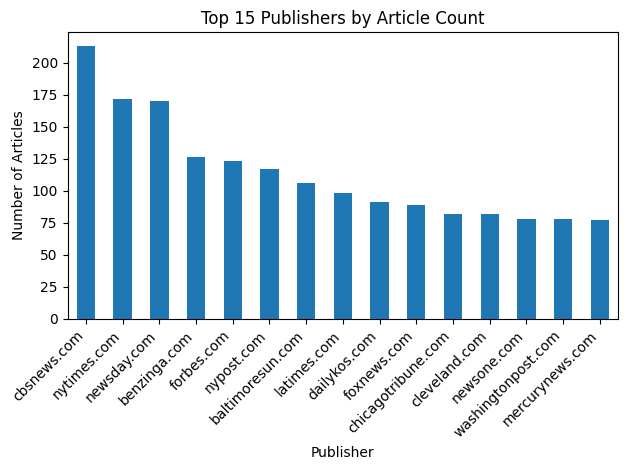

In [ ]:
# plot_publishers_articles(mc_articles_text)
# plot_publishers_articles(mc_articles_hl_24)
plot_publishers_articles(mc_articles_black_24)

In [ ]:
from time import time

from sklearn.datasets import fetch_20newsgroups
from sklearn.decomposition import LatentDirichletAllocation, NMF, MiniBatchNMF
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [ ]:
tfidf_vectorizer = TfidfVectorizer(max_df = 0.95, min_df = 2, max_features = 15000, stop_words = 'english')
tfidf = tfidf_vectorizer.fit_transform(mc_articles_text['text'])

In [ ]:
num_components = 10
max_iterations = 7500
l1_ratio = 0.5

# Frobenius loss min error = 102.733
# KL loss min error = 887.924

nmf_model = NMF(
    n_components = num_components,
    random_state = 2024,
    init = "nndsvda",
    max_iter = max_iterations,
    #beta_loss = "kullback-leibler",
    solver = "mu",
    alpha_W = 0.00005, # 0.00005
    l1_ratio = 0.5, # 0.5 best
    verbose = 1
)

nmf_model.fit(tfidf)

Epoch 10 reached after 3.112 seconds, error: 102.700498
Epoch 20 reached after 5.609 seconds, error: 102.733834


NMF(alpha_W=5e-05, init='nndsvda', l1_ratio=0.5, max_iter=7500, n_components=10,
    random_state=2024, solver='mu', verbose=1)

In [ ]:
# Slightly adapted from the sklearn documentation

def plot_top_words(model_obj, features, num_top_words, loss_used=None, type="NMF"):
  fig, axes = plt.subplots(2, 5, figsize = (30, 15), sharex = True)
  axes = axes.flatten()

  topics_and_features = {}
  for topic_index, topic in enumerate(model_obj.components_):
    top_feature_indices = topic.argsort()[-num_top_words:]
    top_features = [features[x] for x in top_feature_indices]
    weights = topic[top_feature_indices]

    topic_bar_axis = axes[topic_index]
    topic_bar_axis.barh(top_features, weights, height=0.7)
    topics_and_features[topic_index] = top_features
    topic_bar_axis.set_title(f"Topic {topic_index + 1}", fontdict = {"fontsize": 30})
    topic_bar_axis.tick_params(axis = "both", which = "major", labelsize = 20)
    for i in ["top", "right", "left"]:
      topic_bar_axis.spines[i].set_visible(False)
  #f"Topics in NMF Model with {loss_used} Loss"

  if (type == "NMF"):
    sep = loss_used.split("-")
    if (len(sep) > 1):
      loss_used = "-".join([sep[0].capitalize(), sep[1].capitalize()])
    fig.suptitle(f"Topics in NMF Model with {loss_used} Loss", fontsize = 40)
  else:
    fig.suptitle("Topics in LDA Model", fontsize = 40)
  plt.subplots_adjust(bottom = 0.05, wspace = 0.90, hspace = 0.3)
  #plt.savefig("NMF_top_words.png")
  plt.show()

  return topics_and_features

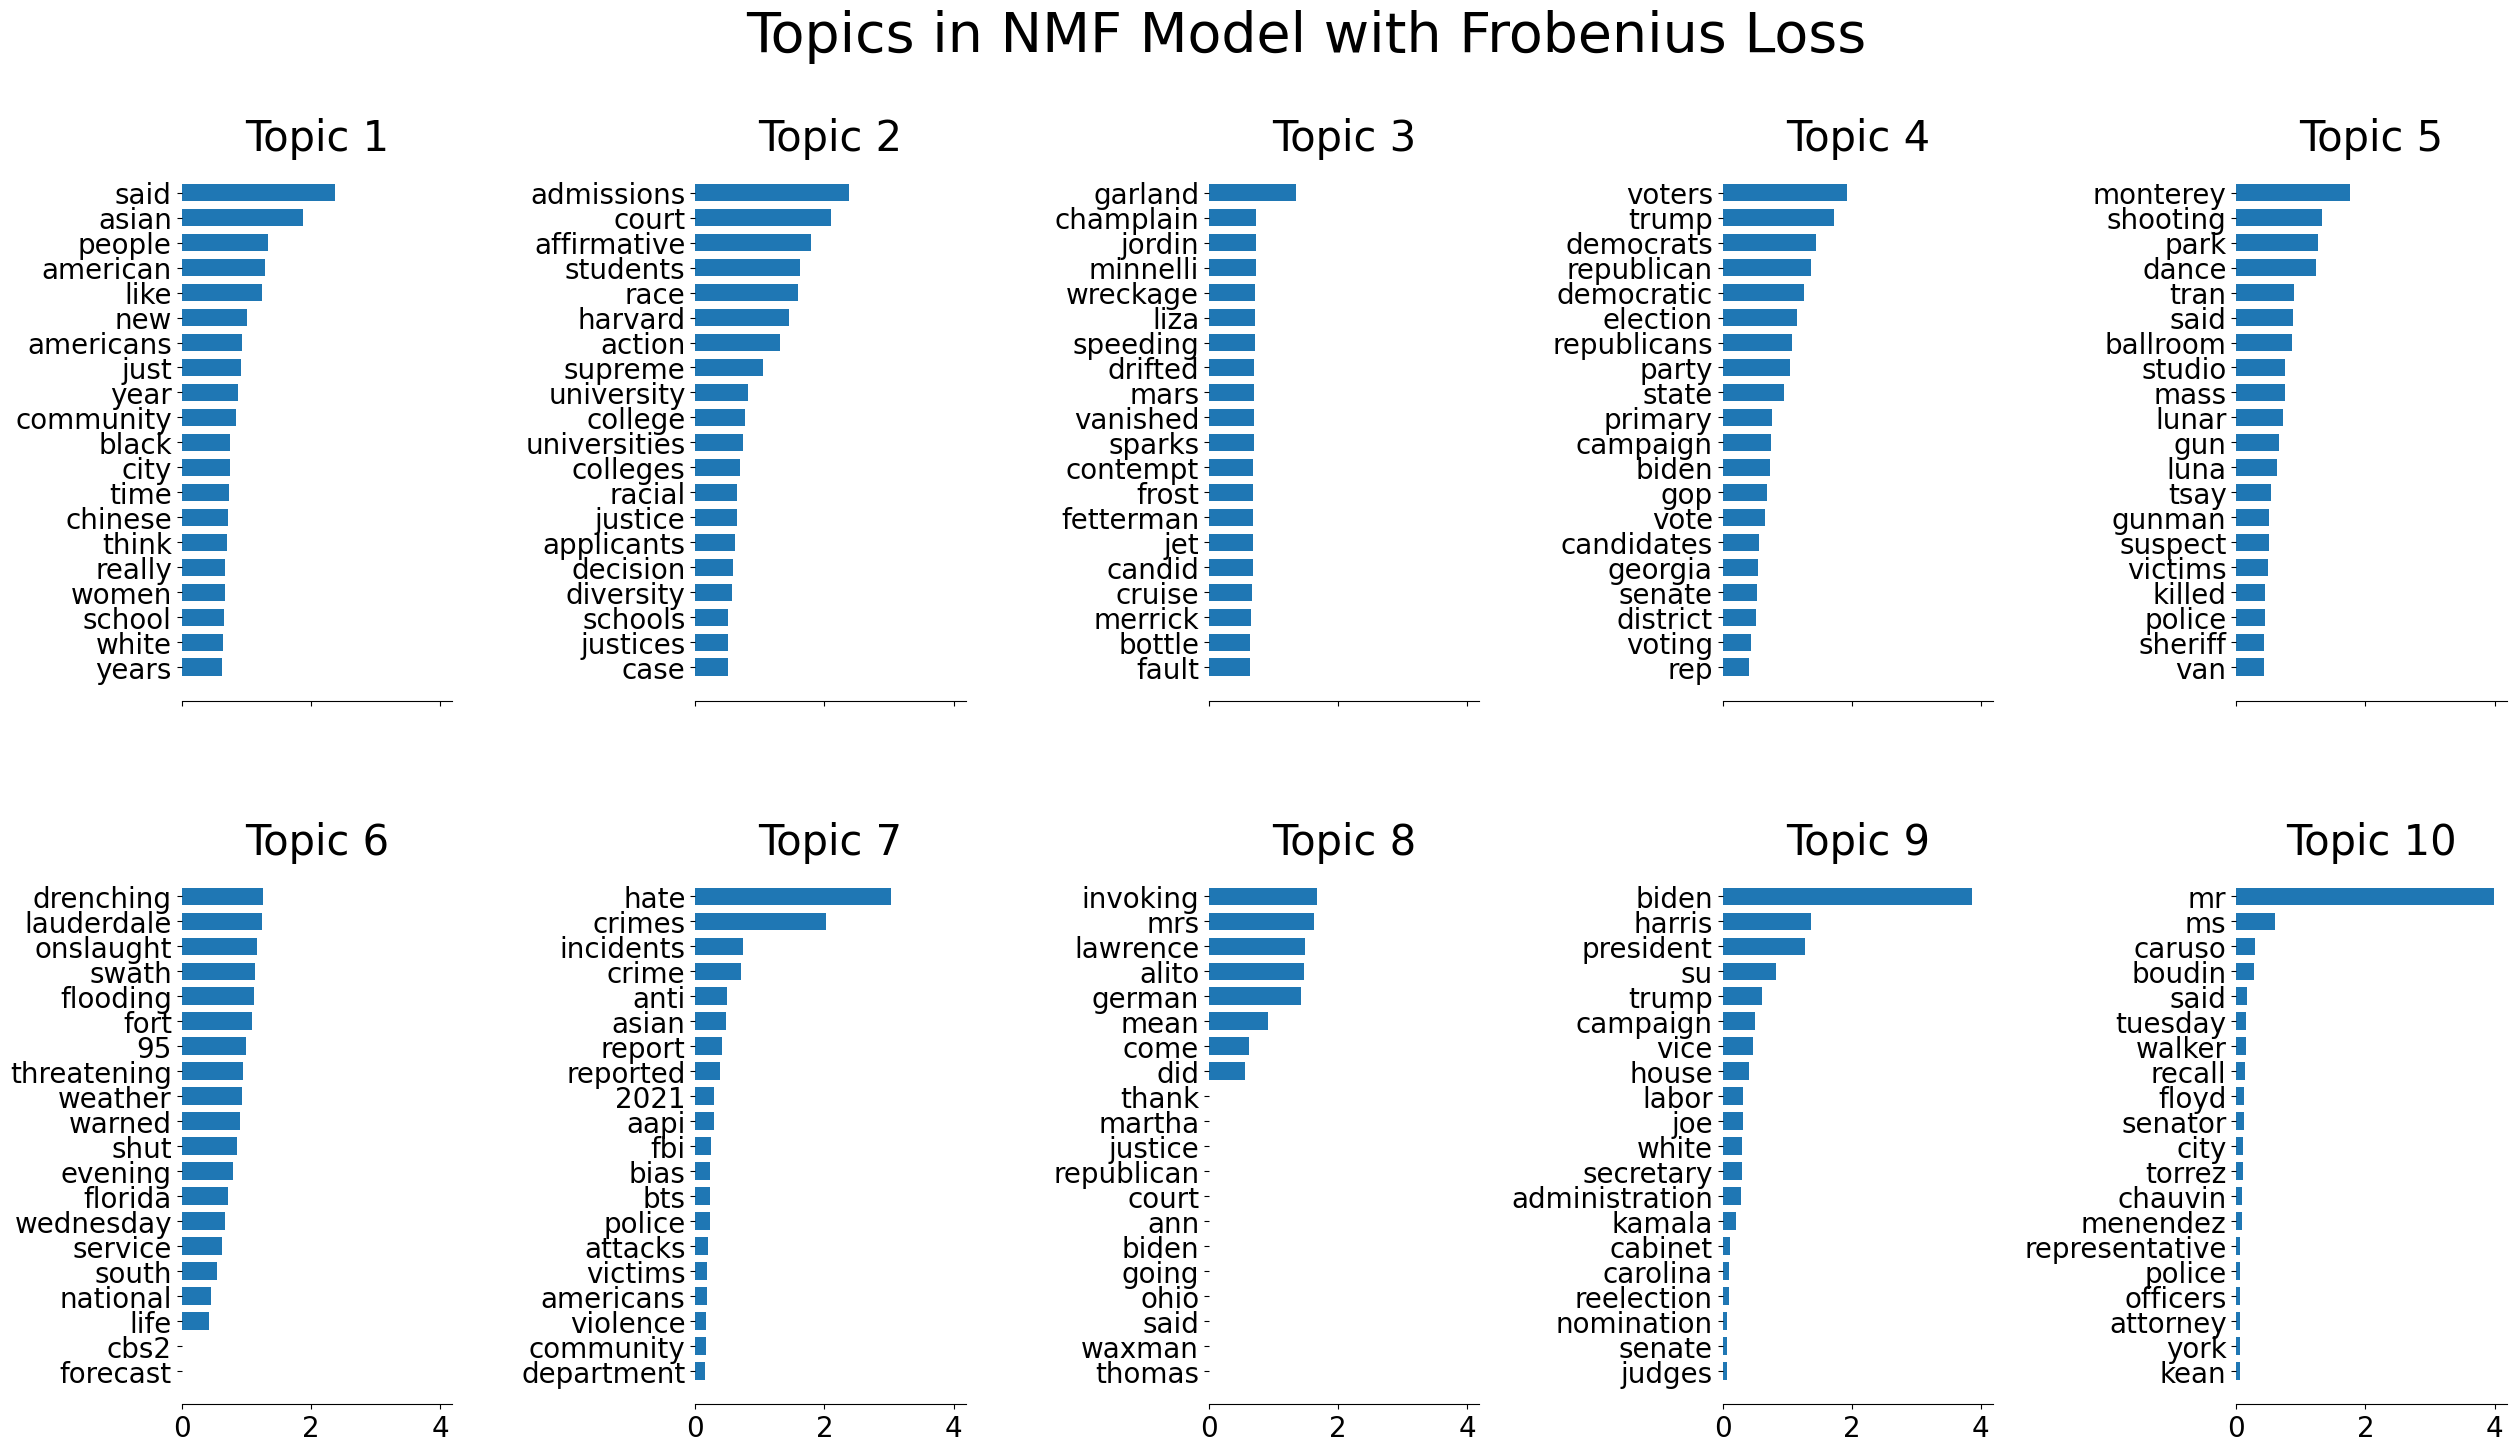

In [ ]:
num_top_words = 20
tfidf_features = tfidf_vectorizer.get_feature_names_out()
topics_and_features = plot_top_words(nmf_model, tfidf_features, num_top_words, nmf_model.beta_loss.capitalize())

In [ ]:
nmf_components = nmf_model.components_
total_weight = nmf_components.sum()
feature_frequencies = 100 * nmf_components.sum(axis=0) / total_weight

feature_freq_dict = {tfidf_features[i]: feature_frequencies[i] for i in range(len(tfidf_features))}

all_sorted_features = sorted(feature_freq_dict.items(), key=lambda x: x[1], reverse=True)

print(all_sorted_features[:20])

[('biden', 1.3191670314365185), ('mr', 1.1472785971666364), ('said', 1.048939345064023), ('hate', 0.9323112302867611), ('asian', 0.6960322090177661), ('trump', 0.6715657689771799), ('admissions', 0.6579005262512776), ('court', 0.6558076137946998), ('voters', 0.5893867483572608), ('students', 0.5891523309714378), ('president', 0.5836313660439869), ('race', 0.5830496172920347), ('crimes', 0.5776910961285985), ('affirmative', 0.49889774060685077), ('monterey', 0.48470006843903074), ('new', 0.4638346508384125), ('people', 0.4584775700502745), ('invoking', 0.45800445733943873), ('mrs', 0.44371923138001174), ('democrats', 0.4309906616832008)]


In [ ]:
feature_freq_df = pd.DataFrame(feature_freq_dict.items(), columns = ['Feature', 'Relative Weight']).sort_values(['Relative Weight'], ascending = False)
#feature_freq_df['Num_Articles'] = round(len(mc_articles_text) * feature_freq_df['Relative Weight'] / 100)
feature_freq_df.reset_index(drop = True, inplace = True)
#feature_freq_df = feature_freq_df[feature_freq_df['Num_Articles'] > 0]
feature_freq_df.head(15)

,Feature,Relative Weight
0,biden,1.319167
1,mr,1.147279
2,said,1.048939
3,hate,0.932311
4,asian,0.696032
5,trump,0.671566
6,admissions,0.657901
7,court,0.655808
8,voters,0.589387
9,students,0.589152


In [ ]:
import itertools

feature_occurrences = np.sum(tfidf, axis = 0)
words_summed_tfidf = {tfidf_features[i]: feature_occurrences[0, i] for i in range(len(tfidf_features))}
sorted_words = sorted(words_summed_tfidf.items(), key = lambda x: x[1], reverse=True)
words_summed_tfidf_sorted = {word: tfidf_score for word, tfidf_score in sorted_words}
print(list(words_summed_tfidf_sorted)[:15])

total_tfidf = feature_occurrences.sum()
word_perc_tfidf = {word: (tfidf_score / total_tfidf) * 100 for word, tfidf_score in words_summed_tfidf_sorted.items()}
list(word_perc_tfidf)[:15]

['said', 'asian', 'new', 'american', 'people', 'like', 'year', 'students', 'biden', 'black', 'court', 'just', 'state', 'community', 'race']


['said',
 'asian',
 'new',
 'american',
 'people',
 'like',
 'year',
 'students',
 'biden',
 'black',
 'court',
 'just',
 'state',
 'community',
 'race']

In [ ]:
tf_vectorizer = CountVectorizer(max_df = 0.95, min_df = 2, max_features = 15000, stop_words = 'english')
tf = tf_vectorizer.fit_transform(mc_articles_text['text'])

In [ ]:
word_occurences = (tf.toarray() > 0).astype(int).sum(axis = 0)

word_occurence_dict = dict(zip(tfidf_features, word_occurences))
sorted_word_occurences = sorted(word_occurence_dict.items(), key = lambda x: x[1], reverse=True)
word_occurence_dict = {word: count for word, count in sorted_word_occurences if count > 0}
list(word_occurence_dict)[:10]

['american',
 'asian',
 'said',
 'new',
 'people',
 'like',
 'year',
 'time',
 'just',
 'years']

In [ ]:
feature_freq_df['Num_Articles'] = feature_freq_df['Feature'].map(word_occurence_dict)
feature_freq_df['tf-idf_score'] = feature_freq_df['Feature'].map(words_summed_tfidf_sorted)
feature_freq_df['Percent_Article_Occurence'] = 100 * round((feature_freq_df['Num_Articles'] / len(mc_articles_text)), 4)
feature_freq_df.head(15)

,Feature,Relative Weight,Num_Articles,tf-idf_score,Percent_Article_Occurence
0,biden,1.319167,2107,194.938665,18.04
1,mr,1.147279,774,113.141678,6.63
2,said,1.048939,7446,488.750262,63.76
3,hate,0.932311,1842,140.487351,15.77
4,asian,0.696032,8975,351.160415,76.85
5,trump,0.671566,1724,148.876031,14.76
6,admissions,0.657901,968,151.469966,8.29
7,court,0.655808,2207,188.614195,18.90
8,voters,0.589387,1652,137.188735,14.15
9,students,0.589152,2153,205.944192,18.43


In [ ]:
# Look at frequencies/in different time periods/intervals (i.e. in 2022, 2023, 2024)

###Latent Dirichlet Allocation (LDA)

In [ ]:
!pip install pyLDAvis tmtoolkit plotly

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 33.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.5/10.5 MB 76.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for globre: filename=globre-0.1.5-py3-none-any.whl size=19546 sha256=3e6585274f1da94ad9237311093d8fc23e6849b36d3ce45876cb44ea154c9679
  Stored in directory: /root/.cache/pip/wheels/e6/c5/26/0d27e07d567b3b4e63a618efff19a2cdbab636ac1295d20206
Successfully built globre


In [ ]:
from tmtoolkit.topicmod.evaluate import metric_coherence_gensim

In [ ]:
import pyLDAvis.lda_model
pyLDAvis.enable_notebook(local=True)

def run_LDA_analysis(df, text_type='text', max_iterations=50, num_top_words=20):

  print(f"Running model on {df.attrs['name']}")

  tf_vectorizer = CountVectorizer(max_df = 0.95, min_df = 2, max_features = 10000, stop_words = 'english')
  tf = tf_vectorizer.fit_transform(df[text_type])

  lda_model = LatentDirichletAllocation(
      n_components = 15,
      max_iter = max_iterations,
      random_state = 2024,
      learning_method = "online",
      verbose = 1
  )

  lda_model.fit(tf)

  topic_word_distribution = lda_model.components_ / lda_model.components_.sum(axis=1)[:, np.newaxis]
  # print(topic_word_distribution.shape)

  analyzer_func = tf_vectorizer.build_analyzer()
  tokenized_articles = [analyzer_func(article) for article in df[text_type]]
  # print(len(tokenized_articles))

  sorted_vocabulary = sorted(tf_vectorizer.vocabulary_.items(), key = lambda x: x[1])
  words = [pair[0] for pair in sorted_vocabulary]

  # print(np.array(words).shape)

  print("Calculating coherence score...")
  coherence_score = metric_coherence_gensim(measure="u_mass", topic_word_distrib=topic_word_distribution,
                                            dtm=tf, vocab=np.array(words),
                                            texts=tokenized_articles)
  dict_coherence = {i: coherence_score[i - 1] for i in range(1, len(coherence_score) + 1)}
  sorted_coherence = sorted(dict_coherence.items(), key = lambda x: x[1])
  print(sorted_coherence)

  topic_dists_per_doc = lda_model.transform(tf) # _vectorizer.transform(df[text_type])

  prepared_data = pyLDAvis.lda_model.prepare(lda_model, tf, tf_vectorizer)
  pyLDAvis.display(prepared_data)

  return lda_model, tf_vectorizer, tf, topic_dists_per_doc

In [ ]:
mc_articles_text.attrs['name'] = "mc_articles_text"
all_years_LDA, all_years_vectorizer, tf_all, topic_dists_all = run_LDA_analysis(mc_articles_text, text_type="title")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Running model on mc_articles_text
iteration: 1 of max_iter: 50
iteration: 2 of max_iter: 50
iteration: 3 of max_iter: 50
iteration: 4 of max_iter: 50
iteration: 5 of max_iter: 50
iteration: 6 of max_iter: 50
iteration: 7 of max_iter: 50
iteration: 8 of max_iter: 50
iteration: 9 of max_iter: 50
iteration: 10 of max_iter: 50
iteration: 11 of max_iter: 50
iteration: 12 of max_iter: 50
iteration: 13 of max_iter: 50
iteration: 14 of max_iter: 50
iteration: 15 of max_iter: 50
iteration: 16 of max_iter: 50
iteration: 17 of max_iter: 50
iteration: 18 of max_iter: 50
iteration: 19 of max_iter: 50
iteration: 20 of max_iter: 50
iteration: 21 of max_iter: 50
iteration: 22 of max_iter: 50
iteration: 23 of max_iter: 50
iteration: 24 of max_iter: 50
iteration: 25 of max_iter: 50
iteration: 26 of max_iter: 50
iteration: 27 of max_iter: 50
iteration: 28 of max_iter: 50
iteration: 29 of max_iter: 50
iteration: 30 of max_iter: 50
iteration: 31 of max_iter: 50
iteration: 32 of max_iter: 50
iteration: 33 o

In [ ]:
from IPython.display import display, HTML

def plot_save_LDA(model, tf_file, vect, title):
  prepared_data = pyLDAvis.lda_model.prepare(model, tf_file, vect)
  pyLDAvis.save_html(prepared_data, title)

  return display(HTML(title))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Groups:
2 (Film),
6/11 (American/Asian Culture, Heritage/Identity),
4/13 (Proliferation of Violence/Hate, Minority Insecurity),
1/12 (Foreign Policy, Govt, Politics),
8/15 (Affirmative Action and Education),
9 (Social Culture/Events),
10 (Health, Data and Science),
7 (Economy, Businesses, and Tech)

In [ ]:
plot_save_LDA(all_years_LDA, tf_all, all_years_vectorizer, "LDA_15topics_all_years_titles.html")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
model22, vectorizer22, tf22, dists22 = run_LDA_analysis(mc_articles_2022, text_type="title")
plot_save_LDA(model22, tf22, vectorizer22, "LDA_15topics_2022.html")

model23, vectorizer23, tf23, dists23 = run_LDA_analysis(mc_articles_2023, text_type="title")
plot_save_LDA(model23, tf23, vectorizer23, "LDA_15topics_2023.html")

model24, vectorizer24, tf24, dists24 = run_LDA_analysis(mc_articles_2024, text_type="title")
plot_save_LDA(model24, tf24, vectorizer24, "LDA_15topics_2024.html")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Running model on mc_articles_2022
iteration: 1 of max_iter: 50
iteration: 2 of max_iter: 50
iteration: 3 of max_iter: 50
iteration: 4 of max_iter: 50
iteration: 5 of max_iter: 50
iteration: 6 of max_iter: 50
iteration: 7 of max_iter: 50
iteration: 8 of max_iter: 50
iteration: 9 of max_iter: 50
iteration: 10 of max_iter: 50
iteration: 11 of max_iter: 50
iteration: 12 of max_iter: 50
iteration: 13 of max_iter: 50
iteration: 14 of max_iter: 50
iteration: 15 of max_iter: 50
iteration: 16 of max_iter: 50
iteration: 17 of max_iter: 50
iteration: 18 of max_iter: 50
iteration: 19 of max_iter: 50
iteration: 20 of max_iter: 50
iteration: 21 of max_iter: 50
iteration: 22 of max_iter: 50
iteration: 23 of max_iter: 50
iteration: 24 of max_iter: 50
iteration: 25 of max_iter: 50
iteration: 26 of max_iter: 50
iteration: 27 of max_iter: 50
iteration: 28 of max_iter: 50
iteration: 29 of max_iter: 50
iteration: 30 of max_iter: 50
iteration: 31 of max_iter: 50
iteration: 32 of max_iter: 50
iteration: 33 o

Running model on mc_articles_2023
iteration: 1 of max_iter: 50
iteration: 2 of max_iter: 50
iteration: 3 of max_iter: 50
iteration: 4 of max_iter: 50
iteration: 5 of max_iter: 50
iteration: 6 of max_iter: 50
iteration: 7 of max_iter: 50
iteration: 8 of max_iter: 50
iteration: 9 of max_iter: 50
iteration: 10 of max_iter: 50
iteration: 11 of max_iter: 50
iteration: 12 of max_iter: 50
iteration: 13 of max_iter: 50
iteration: 14 of max_iter: 50
iteration: 15 of max_iter: 50
iteration: 16 of max_iter: 50
iteration: 17 of max_iter: 50
iteration: 18 of max_iter: 50
iteration: 19 of max_iter: 50
iteration: 20 of max_iter: 50
iteration: 21 of max_iter: 50
iteration: 22 of max_iter: 50
iteration: 23 of max_iter: 50
iteration: 24 of max_iter: 50
iteration: 25 of max_iter: 50
iteration: 26 of max_iter: 50
iteration: 27 of max_iter: 50
iteration: 28 of max_iter: 50
iteration: 29 of max_iter: 50
iteration: 30 of max_iter: 50
iteration: 31 of max_iter: 50
iteration: 32 of max_iter: 50
iteration: 33 o

Running model on mc_articles_2024
iteration: 1 of max_iter: 50
iteration: 2 of max_iter: 50
iteration: 3 of max_iter: 50
iteration: 4 of max_iter: 50
iteration: 5 of max_iter: 50
iteration: 6 of max_iter: 50
iteration: 7 of max_iter: 50
iteration: 8 of max_iter: 50
iteration: 9 of max_iter: 50
iteration: 10 of max_iter: 50
iteration: 11 of max_iter: 50
iteration: 12 of max_iter: 50
iteration: 13 of max_iter: 50
iteration: 14 of max_iter: 50
iteration: 15 of max_iter: 50
iteration: 16 of max_iter: 50
iteration: 17 of max_iter: 50
iteration: 18 of max_iter: 50
iteration: 19 of max_iter: 50
iteration: 20 of max_iter: 50
iteration: 21 of max_iter: 50
iteration: 22 of max_iter: 50
iteration: 23 of max_iter: 50
iteration: 24 of max_iter: 50
iteration: 25 of max_iter: 50
iteration: 26 of max_iter: 50
iteration: 27 of max_iter: 50
iteration: 28 of max_iter: 50
iteration: 29 of max_iter: 50
iteration: 30 of max_iter: 50
iteration: 31 of max_iter: 50
iteration: 32 of max_iter: 50
iteration: 33 o

In [ ]:
model_black, vect_black, tf_black, dists_black = run_LDA_analysis(mc_articles_black_24)
plot_save_LDA(model_black, tf_black, vect_black, "LDA_15topics_black_24.html")

# model_hl, vect_hl, tf_hl, dists_hl = run_LDA_analysis(mc_articles_hl_24)
# plot_save_LDA(model_hl, tf_hl, vect_hl, "LDA_15topics_hl_24.html")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Running model on mc_articles_black_24
iteration: 1 of max_iter: 50
iteration: 2 of max_iter: 50
iteration: 3 of max_iter: 50
iteration: 4 of max_iter: 50
iteration: 5 of max_iter: 50
iteration: 6 of max_iter: 50
iteration: 7 of max_iter: 50
iteration: 8 of max_iter: 50
iteration: 9 of max_iter: 50
iteration: 10 of max_iter: 50
iteration: 11 of max_iter: 50
iteration: 12 of max_iter: 50
iteration: 13 of max_iter: 50
iteration: 14 of max_iter: 50
iteration: 15 of max_iter: 50
iteration: 16 of max_iter: 50
iteration: 17 of max_iter: 50
iteration: 18 of max_iter: 50
iteration: 19 of max_iter: 50
iteration: 20 of max_iter: 50
iteration: 21 of max_iter: 50
iteration: 22 of max_iter: 50
iteration: 23 of max_iter: 50
iteration: 24 of max_iter: 50
iteration: 25 of max_iter: 50
iteration: 26 of max_iter: 50
iteration: 27 of max_iter: 50
iteration: 28 of max_iter: 50
iteration: 29 of max_iter: 50
iteration: 30 of max_iter: 50
iteration: 31 of max_iter: 50
iteration: 32 of max_iter: 50
iteration: 

In [ ]:
nums_topics_22 = {
    (2, 11, 12): "Elections and Politics",
    10: "Hate, Crime and Violence",
    (7, 13): "TV, Media and Entertainment",
    (3, 5): "Health, Data, and Social/Racial Inequality",
    (4, 6): "Affirmative Action, Education and Community",
    8: "Food and Social Culture",
    9: "Politics, Foreign Affairs and Economics"
}

nums_topics_23 = {
    (4, 7): "Affirmative Action, Education and Community",
    (2, 6): "Community, Identity and Economic Inequality",
    3: "Elections and Politics",
    5: "Hate, Crime and Violence",
    8: "Social Culture and Community Events",
    10: "Israel/Palestine Conflict, Identity + Govt/Media Response",
    (9, 12, 13): "Film, Books, Stories + Entertainment"
}

nums_topics_24 = {
    (4, 6): "Foreign Policy, Elections and Political Instability",
    2: "Violence and Reform",
    3: "Education, Health + Student Identity/Support",
    #5: "Film, Media and Entertainment",
    7: "Community Culture + Events",
    8: "Israel/Palestine Conflict and Student Protest",
    9: "Heritage, Representation and Culture",
    #10: "Restaurants and Cuisine"
}

num_topics_hl_24 = {
    (4, 8, 12): "Politics, Elections and Race",
    1: "Police and Violence/Crime",
    2: "Film and Culture",
    3: "Education, Race/Identity + SES",
    6: "Border and Immigration",
    7: "Trump Convictions, Court and Media",
    (9, 10): "Environment, Health and Transportation",
    14: "Israel/Hamas Conflict, Misinformation + Race",
    15: "Abortion, Female Rights/Healthcare and Court"
}


num_topics_black_24 = {
    2: "Race/Identity, Education and Slavery",
    3: "Politics and Elections",
    14: "Church, Religion, Health and Substances",
    6: "Economics and Housing",
    (8, 15): "Healthcare, Environment and Technology",
    11: "Violence and Shootings",
    12: "Israel/Hamas Conflict, Violence and Protests",
    13: "War, Heritage and Geography",
    (4, 5, 9): "Music, Culture, Film and Media"
    # (5, 6): "Political Issues and Elections",
    # 2: "Slavery, Civil Rights, Culture and History",
    # 7: "Education, Minority Race and Identity",
    # 8: "News, Media, AI and Online Content",
    # 9: "Businesses, Investment and Economics",
    # 10: "Healthcare and the Environment",
    # 11: "Police, Crime and Justice",
    # (3, 14): "Music, Culture, Film and Media"
}

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
nums_to_topics_all = {
    2: "Film",
    (6, 11): "American/Asian Culture + Heritage/Identity",
    (4, 13): "Proliferation of Violence/Hate + Minority Insecurity",
    (1, 12): "Foreign Policy, Govt, Politics",
    (8, 15): "Affirmative Action and Education",
    9: "Social Culture/Events",
    10: "Health, Data and Science",
    7: "Economy, Businesses, and Tech"
}

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
def clean_rename_df(df, nums_to_topics):
  for item in nums_to_topics.items():
    if isinstance(item[0], int):
      print("Renaming " + f"Topic_{item[0]}" + " to " + str(item[1]))
      df.rename(columns = {f"Topic_{item[0]}": item[1]}, inplace = True)
    else:
      cols = [f"Topic_{i}" for i in item[0]]
      df[item[1]] = sum([df[x] for x in cols])

  return df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
def topic_dist_by_publisher(df, publisher, nums_to_topics):
  labels = list(nums_to_topics.values())
  labels.append("Counts")
  sizes = list(df.loc[df['media_name'] == publisher][labels].values[0])
  article_count = sizes[len(labels) - 1]
  labels.pop()
  sizes.pop()
  sizes.append(1 - sum(sizes))
  labels.append("Other")

  year = "20" + df.attrs['name'][-2:]

  fig1, ax1 = plt.subplots(figsize=(8, 5))
  wedges, text, autotexts = ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
  plt.title(f"{publisher} Topic Distribution {year} (n = {round(article_count)})")
  plt.savefig(f"{publisher}_topic_dist_{year}.png", bbox_inches="tight")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
def analyze_publishers(model, df, topic_distribution, id2topic, publisher_list): #, publisher_list = list(mc_articles_text['media_name'].value_counts().index)[:3]
  print("Topic distribution shape: " + str(topic_distribution.shape))

  topic_cols = [f"Topic_{i}" for i in range (1, model.components_.shape[0] + 1)]
  for idx, name in enumerate(topic_cols):
    df[name] = topic_distribution[:, idx]

  publisher_groups = df.groupby(['media_name'])[topic_cols].mean()
  publisher_groups.insert(0, 'media_name', publisher_groups.index)
  publisher_groups['Counts'] = df['media_name'].value_counts(sort = False)
  publisher_groups = publisher_groups.sort_values(by = "Counts", ascending = False)
  publisher_groups.reset_index(drop = True, inplace = True)

  publisher_groups = clean_rename_df(publisher_groups, id2topic)

  for publisher in publisher_list:
    topic_dist_by_publisher(publisher_groups, publisher, id2topic)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Topic distribution shape: (3830, 15)
Renaming Topic_2 to Race/Identity, Education and Slavery
Renaming Topic_3 to Politics and Elections
Renaming Topic_14 to Church, Religion, Health and Substances
Renaming Topic_6 to Economics and Housing
Renaming Topic_11 to Violence and Shootings
Renaming Topic_12 to Israel/Hamas Conflict, Violence and Protests
Renaming Topic_13 to War, Heritage and Geography


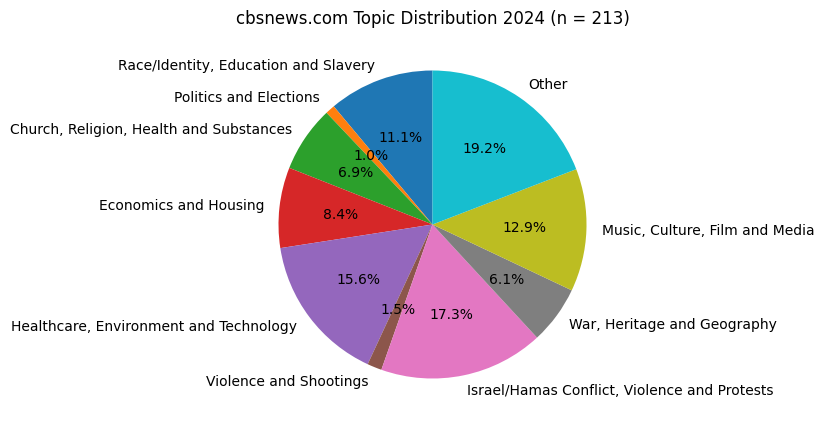

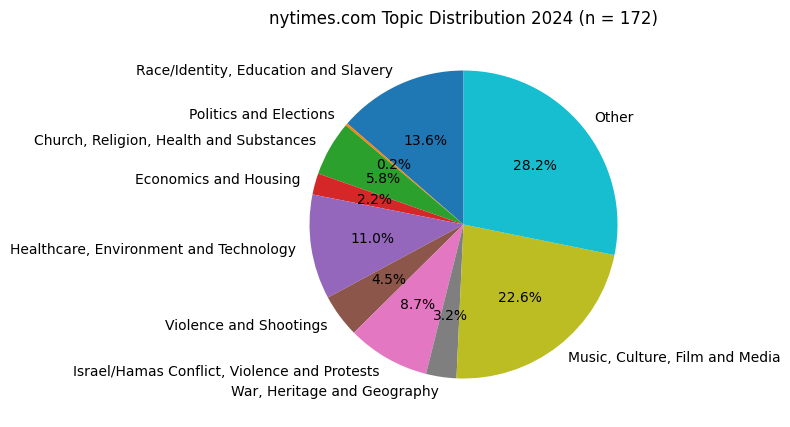

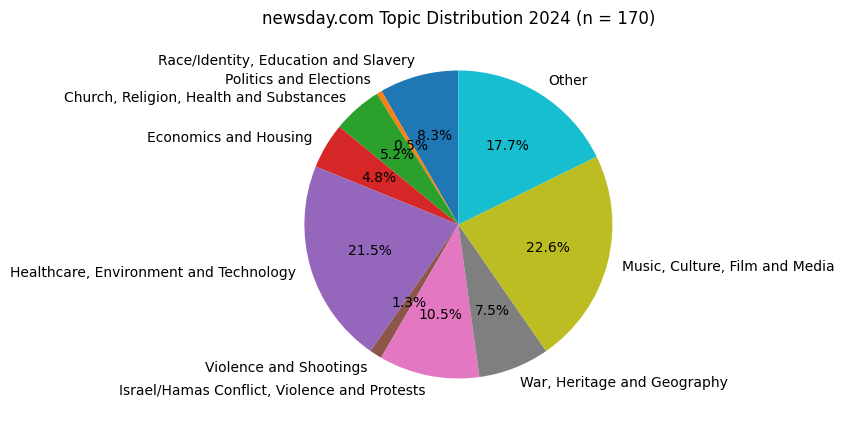

In [ ]:
# analyze_publishers(mc_articles_text, topic_dists_all, nums_to_topics_all)
# analyze_publishers(model22, mc_articles_2022, dists22, nums_topics_22)
# analyze_publishers(model23, mc_articles_2023, dists23, nums_topics_23)
# analyze_publishers(model24, mc_articles_2024, dists24, nums_topics_24, publisher_list=list(mc_articles_2024['media_name'].value_counts().index)[:3])
analyze_publishers(model_black, mc_articles_black_24, dists_black, num_topics_black_24, publisher_list=list(mc_articles_black_24['media_name'].value_counts().index)[:3])
# analyze_publishers(model_hl, mc_articles_hl_24, dists_hl, num_topics_hl_24)